# Process text profiles into images

To create feedback form with texrt information, we loaded images of the text into the google forms - made development easier.

In [1]:
from pilmoji import Pilmoji
from PIL import Image, ImageDraw, ImageFont

In [2]:
import matplotlib.pyplot as plt
import json
import os
from PIL import Image, ImageDraw, ImageFont

In [3]:
joinpath = lambda d, f: os.path.join(d,f)

In [46]:
# A simple dict to transform input height profiles in case a remap is required
# Women profiles were sampled from the same set of heights as male profiles were. 
# This is innaccurate as the average height is smaller - as noted through user feedback on dataset 
transformdict = {"5\'8":"5\'8", "5\'9":"5\'9", "5\'10":"5\'10", "5\'11":"5\'11",
                    "6\'0":"5\'7", "6\'1":"5\'6", "6\'2":"5\'5"}
list(transformdict.keys())

["5'8", "5'9", "5'10", "5'11", "6'0", "6'1", "6'2"]

In [71]:
def mapheights(h):
    transformdict = {"5\'8":"5\'8", "5\'9":"5\'9", "5\'10":"5\'10", "5\'11":"5\'11",
                    "6\'0":"5\'7", "6\'1":"5\'6", "6\'2":"5\'5"}
    return transformdict[h[:-1]]
heights = ["5'8", "5'9", "5'10", "5'11", "6'0", "6'1", "6'2"]

In [16]:
def text_to_image(text, image_width=800, font = "arial.ttf", font_size=24, bg_color=(255, 255, 255), text_color=(0, 0, 0)):
    
    # Split the text into lines for better readability
    lines = text.split('\n')
    print(lines)
    
    # Load a font
    try:
        font = ImageFont.truetype(font, font_size)
        print("Using custom font")
    except IOError:
        font = ImageFont.load_default()

    # Create a temporary image to measure text size
    temp_image = Image.new("RGB", (image_width, 100), bg_color)
    draw = ImageDraw.Draw(temp_image)

    # Calculate image height based on text length
    line_height = draw.textbbox((0, 0), "A", font=font)[3] - draw.textbbox((0, 0), "A", font=font)[1] + 10  # Line height with a bit of padding
    image_height = line_height * len(lines) + 20  # Additional padding
    
    # Create a new image with the calculated dimensions
    image = Image.new("RGB", (image_width, image_height), bg_color)
    
    # Use Pilmoji to draw text with emoji support
    with Pilmoji(image) as pilmoji:
        y = 10
        for line in lines:
            pilmoji.text((10, y), line, font=font, fill=text_color)
            y += line_height

    return image

In [72]:
# dict to map a trait to emoji
emojidict = {

    "Height":"\U0001F9CD",
    "Drinking":"\U0001F377",
    "Smoking":"\U0001F6AC",
    "Looking for": "\U0001F440",
    "Hobbies":"\U0001F3A7"+"\U0001F4DA"+"\U0001F3A8"
}

# get profile information from textfile and split into lines
def getprofile(textpath):
    with open(textpath, 'r') as f:
        text = f.read()
    textsplits = text.split(":")
    profile = textsplits[-1]
    profilesplits = profile.split(" ")
    res = ''
    i = 0
    while(i<len(profilesplits)):
        j = i+6
        for k in range(i, min(j+1, len(profilesplits)) ):
            res += profilesplits[k]+' '
        res += "\n"
        i = j + 1
    res = res.strip()
    return "Profile:\n" + res

# process json file into traits per line
def processjson(path, transformHeight=False):
    with open(path) as jf:
        data = json.load(jf)

    res = ""
    
    for i, (k,v) in enumerate(data.items()):
        if(k=="Text traits"):
            continue
        try:
            emoji = emojidict[k]
        except:
            emoji = ''
        if(type(v) is list):
            res += f"{k} {emoji}: "
            for s in v:
                res += s + " "
        else:
            if(k=="Height" and transformHeight):
                print(f"height = {v}")
                res += f"{k} {emoji}: {mapheights(v)}" 
            else:
                res += f"{k} {emoji}: {v}"
        res += "\n"
    return res

Transforming Heights!
height = 6'0"
["Height 🧍: 5'7", 'Hobbies 🎧📚🎨: Basketball, Drawing, Hiking, Painting, Reading ', 'Drinking 🍷: Often', 'Smoking 🚬: Rarely', 'Looking for 👀: Serious only ', '', 'Profile:', 'Lifes an open canvas, and I ', 'like to fill it with both bold ', 'strokes and quiet reflections. From painting to ', 'hiking, I find joy in moments of ', 'solitude, but I never turn down a ', 'witty conversation. Im looking for something serious, ', 'where we can explore the world together, ', 'with a dash of humor and deep ', 'thought along the way.']
Using custom font


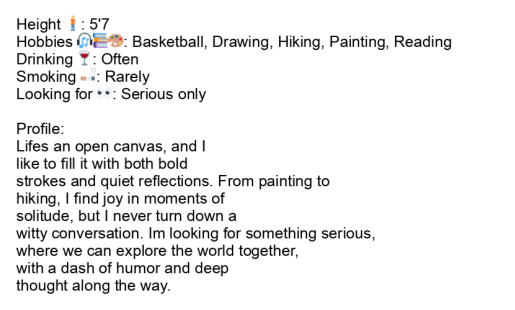

height = 6'2"
["Height 🧍: 5'5", 'Hobbies 🎧📚🎨: Gaming, Soccer, Cooking, Musician, Football ', 'Drinking 🍷: Socially', 'Smoking 🚬: Never', 'Looking for 👀: Something casual ', '', 'Profile:', 'Lifes an adventure, and Im all ', 'about striking the right balance. Whether Im ', 'gaming or cooking a fresh meal, I ', 'enjoy the excitement of learning new things. ', 'Soccer and football keep me competitive, but ', 'I also know how to enjoy a ', 'laidback evening. If youre looking for something ', 'casual, lets team up for a gaming ', 'session followed by some culinary delights!']
Using custom font


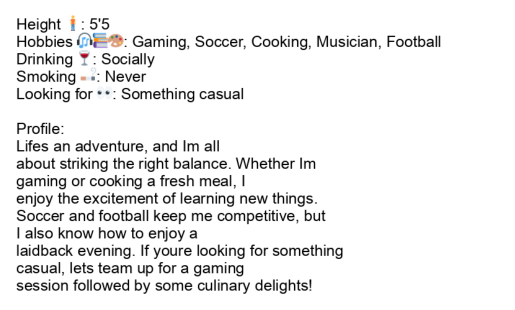

height = 6'0"
["Height 🧍: 5'7", 'Hobbies 🎧📚🎨: Writing, Gaming, Baking, Cooking, Meditation ', 'Drinking 🍷: Socially', 'Smoking 🚬: Socially', 'Looking for 👀: Serious only ', '', 'Profile:', 'A heartfelt storyteller and a kitchen ', 'wizard, I blend flavors and narratives in ', 'all I do. If youre looking for ', 'a serious connection filled with creativity and ', 'charm, lets share our favorite recipes and ', 'dream up a world of stories together!']
Using custom font


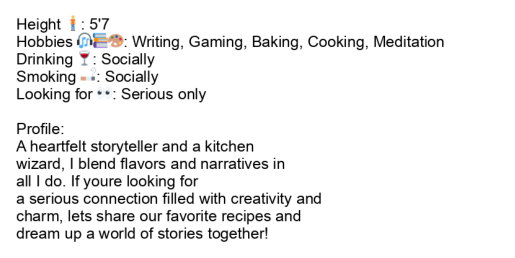

height = 5'9"
["Height 🧍: 5'9", 'Hobbies 🎧📚🎨: Singing, Meditation, Dancing, Reading, Soccer ', 'Drinking 🍷: Never', 'Smoking 🚬: Often', 'Looking for 👀: Serious only ', '', 'Profile:', 'A passionate performer at heart, I ', 'thrive on creativitywhether Im singing my soul ', 'out or scoring goals on the soccer ', 'field. If youre seeking a serious relationship ', 'filled with artistic spirit and emotional depth, ', 'lets connect!']
Using custom font


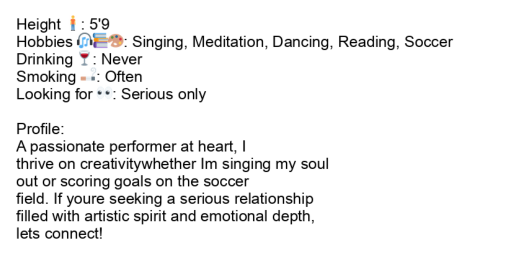

height = 5'10"
["Height 🧍: 5'10", 'Hobbies 🎧📚🎨: Dancing, Coding, Meditation, Football, Yoga ', 'Drinking 🍷: Socially', 'Smoking 🚬: Never', 'Looking for 👀: Serious only ', '', 'Profile:', 'I approach life with a balance ', 'of movement and mindfulnesscoding to get creative ', 'and yoga to stay grounded. Football keeps ', 'me active, and meditation helps me stay ', 'present. Im looking for a serious connection, ', 'where we can engage in deep conversations, ', 'but also share spontaneous adventures. Lets explore ', 'lifes rhythms together.']
Using custom font


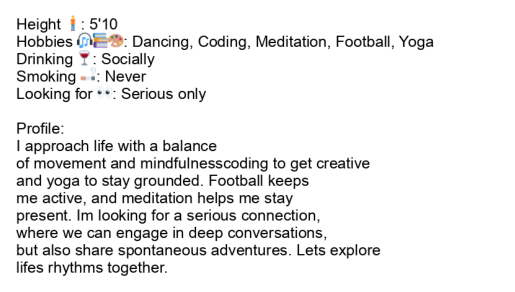

height = 6'2"
["Height 🧍: 5'5", 'Hobbies 🎧📚🎨: Coding, Dancing, Drawing, Cooking, Reading ', 'Drinking 🍷: Often', 'Smoking 🚬: Rarely', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'From coding up a new project ', 'to getting lost in a good book, ', 'Im all about balanceboth in life and ', 'in love. I enjoy dancing and drawing ', 'when I want to unwind, and cooking ', 'is my favorite way to show care. ', 'While I enjoy the lightheartedness of life, ', 'I also seek something somewhat serious where ', 'we can explore lifes adventures with sincerity ', 'and ease.']
Using custom font


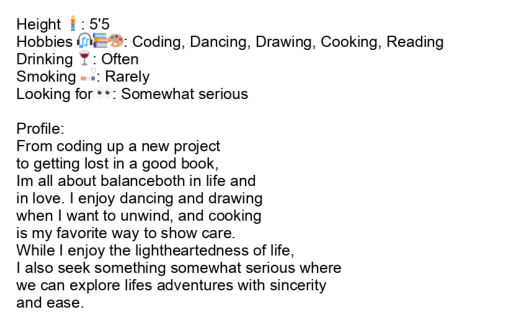

height = 5'8"
["Height 🧍: 5'8", 'Hobbies 🎧📚🎨: Hiking, Soccer, Meditation, Painting, Yoga ', 'Drinking 🍷: Often', 'Smoking 🚬: Rarely', 'Looking for 👀: Something casual ', '', 'Profile:', 'Lifes a mix of quiet moments ', 'and highenergy adventures, whether Im out on ', 'a hike or painting a new masterpiece. ', 'I approach everything with generosity and compassion, ', 'believing in giving and receiving equally. If ', 'youre looking for something casual, lets enjoy ', 'the small moments that make life meaningful.']
Using custom font


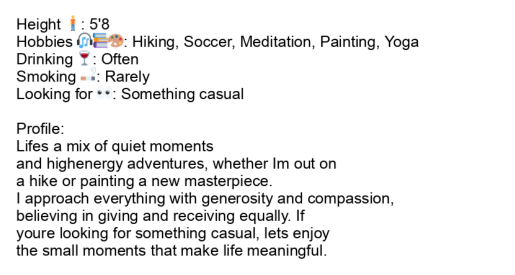

height = 5'9"
["Height 🧍: 5'9", 'Hobbies 🎧📚🎨: Dancing, Basketball, Gaming, Baking, Running ', 'Drinking 🍷: Socially', 'Smoking 🚬: Often', 'Looking for 👀: Serious only ', '', 'Profile:', 'Lifes about rhythm for mewhether its ', 'dancing or running, I love moving to ', 'my own beat. My sense of humor ', 'keeps things interesting, but I also enjoy ', 'a good challenge on the court or ', 'in the kitchen. If youre ready for ', 'something real and adventurous, we might just ', 'be on the same wavelength.']
Using custom font


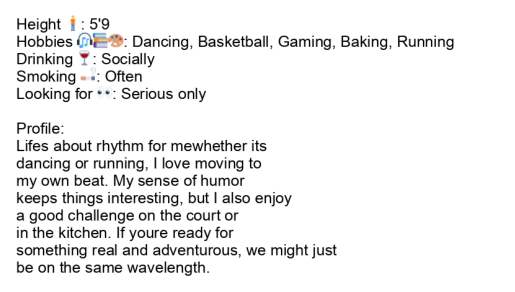

height = 6'1"
["Height 🧍: 5'6", 'Hobbies 🎧📚🎨: Football, Coding, Running, Gaming, Yoga ', 'Drinking 🍷: Often', 'Smoking 🚬: Socially', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Ive always got my mind racing ', 'with new ideas. From running to gaming ', 'to yoga, I like mixing up my ', 'routines to keep things interesting. Im the ', 'kind of person who loves to get ', 'creative but also enjoys those grounding moments. ', 'Looking for someone who can keep up ', 'with both my energy and my curiosity, ', 'and create something meaningful along the way.']
Using custom font


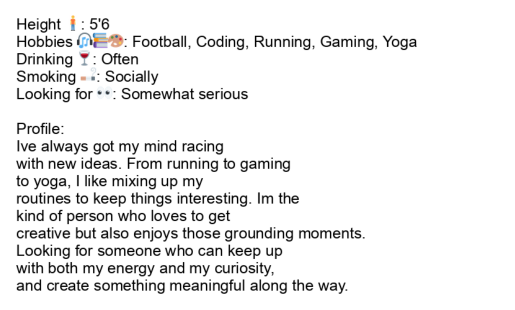

height = 6'0"
["Height 🧍: 5'7", 'Hobbies 🎧📚🎨: Soccer, Coding, Football, Singing, Hiking ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Socially', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'My minds constantly at playwhether Im ', 'coding, kicking a soccer ball, or belting ', 'out a song. Thoughtful and analytical, I ', 'dig deeper than the surface and seek ', 'a connection that challenges me in the ', 'best ways. If youre up for thoughtful ', 'conversations and spontaneous adventures, we just might ', 'click.']
Using custom font


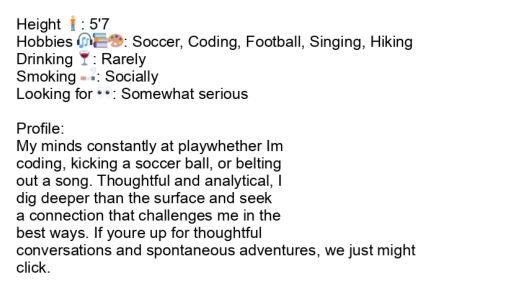

height = 5'10"
["Height 🧍: 5'10", 'Hobbies 🎧📚🎨: Basketball, Reading, Drawing, Running, Writing ', 'Drinking 🍷: Never', 'Smoking 🚬: Never', 'Looking for 👀: Something casual ', '', 'Profile:', "Life's about taking it easy for ", 'me. I love sinking a threepointer on ', 'the court, but Im just as content ', 'losing myself in a good book. Theres ', 'a simple joy in meaningful moments and ', "spontaneous conversations. Im looking for something casuallet's ", 'kick back, share stories, and see where ', 'the journey takes us!']
Using custom font


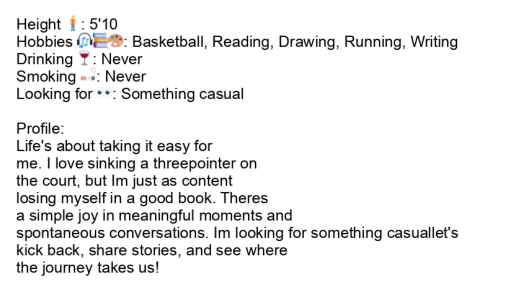

height = 5'10"
["Height 🧍: 5'10", 'Hobbies 🎧📚🎨: Dancing, Running, Singing, Drawing, Basketball ', 'Drinking 🍷: Never', 'Smoking 🚬: Often', 'Looking for 👀: Something casual ', '', 'Profile:', 'Life is a dance, and I ', 'like to approach it with a thoughtful ', 'yet playful attitude. Whether Im running, drawing, ', 'or singing, I keep things light and ', 'fun. If youre looking for something casual, ', 'lets enjoy the little moments together, sharing ', 'laughs and getting to know each other ', 'without the pressurejust two people enjoying life ', 'as it comes.']
Using custom font


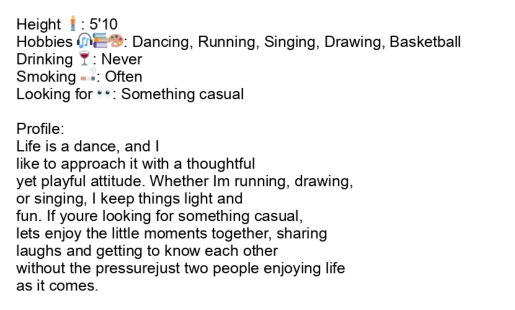

height = 5'9"
["Height 🧍: 5'9", 'Hobbies 🎧📚🎨: Painting, Football, Baking, Coding, Hiking ', 'Drinking 🍷: Never', 'Smoking 🚬: Never', 'Looking for 👀: Something casual ', '', 'Profile:', 'Im all about embracing adventure, whether ', 'thats painting a new piece, baking a ', 'fresh batch of cookies, or heading out ', 'for a hike. I keep things lighthearted ', 'with a sarcastic edge, and Im not ', 'afraid to embrace the spontaneous side of ', 'life. If youre after something casual, lets ', 'enjoy the ride, have a laugh, and ', 'keep things exciting and real.']
Using custom font


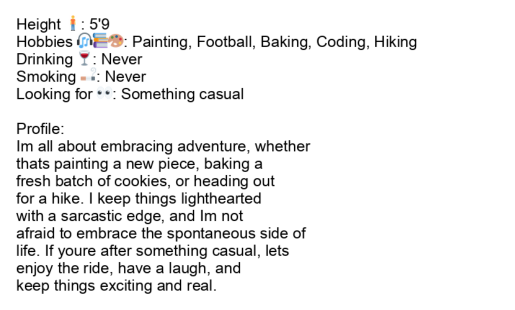

height = 6'0"
["Height 🧍: 5'7", 'Hobbies 🎧📚🎨: Swimming, Drawing, Basketball, Running, Singing ', 'Drinking 🍷: Often', 'Smoking 🚬: Often', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Im always on the move, whether ', 'Im running on a track or sketching ', 'a new idea. With a good sense ', 'of humor and a bit of charm, ', 'I find joy in balancing the thrill ', 'of sports with the calm of creativity. ', 'Im looking for something somewhat serious, where ', 'we can share meaningful moments and enjoy ', 'lifes unpredictable turns.']
Using custom font


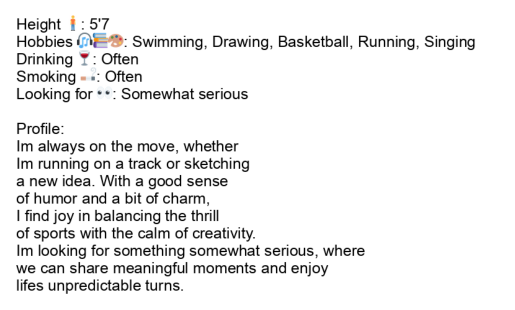

height = 5'9"
["Height 🧍: 5'9", 'Hobbies 🎧📚🎨: Cooking, Coding, Basketball, Baking, Football ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Often', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Whether its coding a new project ', 'or baking up something delicious, I pour ', 'myself into everything I do. On the ', 'court or in the kitchen, its all ', 'about enjoying the process. Im looking for ', 'someone who appreciates sincerity, whos ready for ', 'a real connectionwhether that means getting deep ', 'into conversation or sharing a spontaneous laugh.']
Using custom font


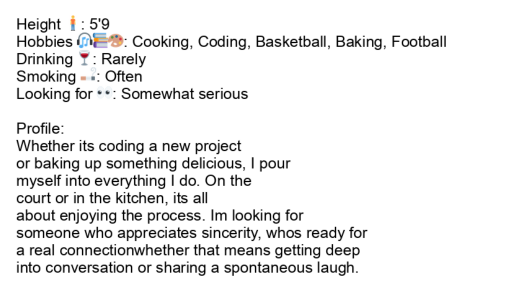

height = 6'0"
["Height 🧍: 5'7", 'Hobbies 🎧📚🎨: Running, Cooking, Basketball, Singing, Swimming ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Rarely', 'Looking for 👀: Serious only ', '', 'Profile:', 'Theres something beautiful about balancewhether its ', 'running, cooking, or singing a tune. Compassionate ', 'and analytical, I seek a connection thats ', 'thoughtful and genuine. If youre looking for ', 'a serious relationship thats grounded in trust ', 'and real conversations, Im all in.']
Using custom font


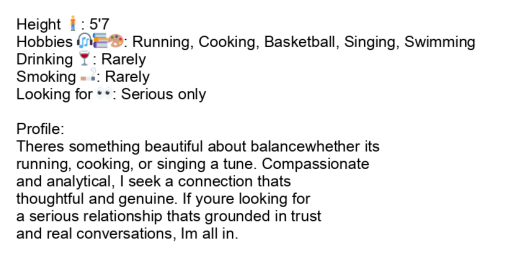

height = 6'1"
["Height 🧍: 5'6", 'Hobbies 🎧📚🎨: Reading, Basketball, Drawing, Musician, Cooking ', 'Drinking 🍷: Socially', 'Smoking 🚬: Socially', 'Looking for 👀: Serious only ', '', 'Profile:', 'My heart finds its rhythm in ', 'music and basketball, but I also find ', 'peace in reading or cooking a meal ', 'to share. Generosity and empathy are at ', 'the core of who I amwhether its ', 'lending a hand or offering an ear. ', 'Im looking for something serious, a relationship ', 'that thrives on understanding and shared moments ', 'of joy.']
Using custom font


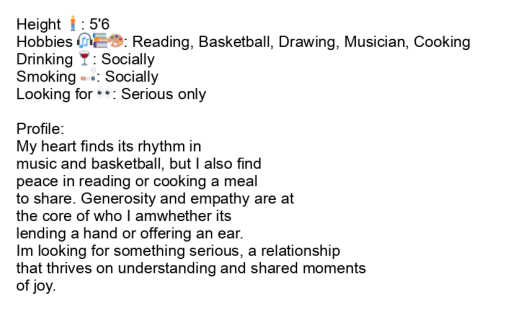

height = 5'9"
["Height 🧍: 5'9", 'Hobbies 🎧📚🎨: Football, Singing, Reading, Cooking, Yoga ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Rarely', 'Looking for 👀: Serious only ', '', 'Profile:', 'With a zest for life and ', 'a love for exploration, I embrace adventure ', 'in all formswhether its on the field ', 'or in the kitchen. Lets find harmony ', 'together in a serious relationship that values ', 'thoughtfulness and a dash of spontaneity!']
Using custom font


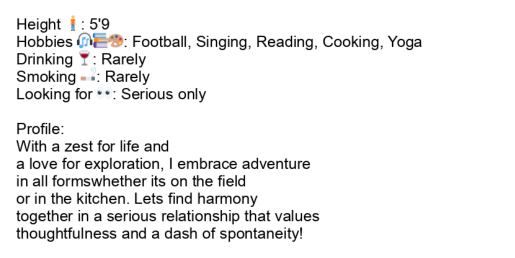

height = 5'11"
["Height 🧍: 5'11", 'Hobbies 🎧📚🎨: Baking, Football, Coding, Running, Basketball ', 'Drinking 🍷: Socially', 'Smoking 🚬: Often', 'Looking for 👀: Something casual ', '', 'Profile:', 'An adventurous spirit with a compassionate ', 'heart, I love baking sweet treats after ', "an exhilarating game of football. If you're ", "looking for something casual, let's explore life ", 'togetherwhether its trying out new recipes or ', 'taking spontaneous road trips!']
Using custom font


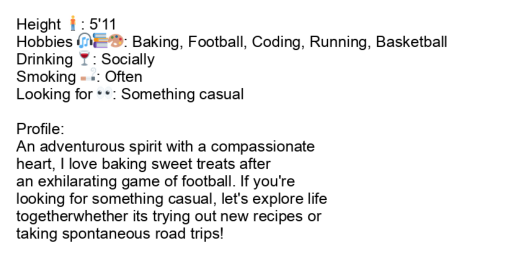

height = 5'8"
["Height 🧍: 5'8", 'Hobbies 🎧📚🎨: Singing, Gaming, Running, Hiking, Coding ', 'Drinking 🍷: Never', 'Smoking 🚬: Rarely', 'Looking for 👀: Serious only ', '', 'Profile:', 'From belting out a tune to ', 'coding my next big idea, I pour ', 'my heart into everything I do. Passion ', 'and compassion guide me, whether Im hiking ', 'the trails or lost in a game. ', 'If youre looking for something serious, lets ', 'build something real, based on our shared ', 'dreams and our willingness to support each ', 'others passions.']
Using custom font


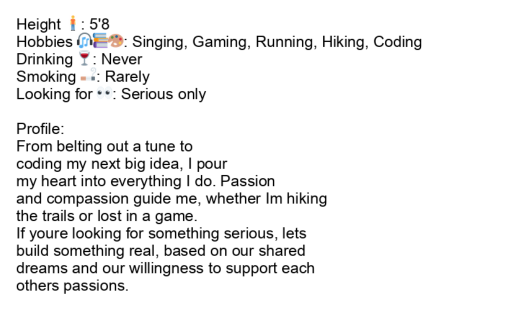

height = 5'11"
["Height 🧍: 5'11", 'Hobbies 🎧📚🎨: Basketball, Writing, Swimming, Baking, Gaming ', 'Drinking 🍷: Often', 'Smoking 🚬: Socially', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'From shooting hoops to baking something ', 'sweet, I live for the balance of ', 'action and reflection. Sincere and compassionate, I ', 'believe in sharing what matters, whether thats ', 'a fun game or a meaningful conversation. ', 'If youre looking for something serious thats ', 'built on trust and spontaneity, lets team ', 'up and see where we land.']
Using custom font


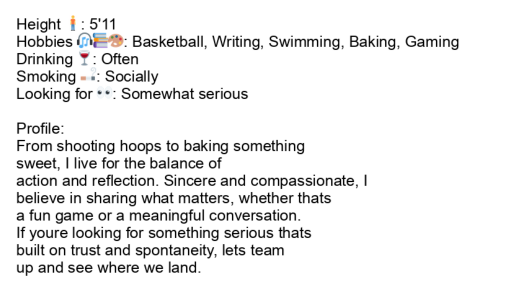

height = 6'2"
["Height 🧍: 5'5", 'Hobbies 🎧📚🎨: Dancing, Cooking, Hiking, Football, Yoga ', 'Drinking 🍷: Socially', 'Smoking 🚬: Socially', 'Looking for 👀: Serious only ', '', 'Profile:', 'I dont just go through life; ', 'I dance through it, with passion, resilience, ', 'and compassion in every step. Whether Im ', 'cooking up a storm or tackling the ', 'trails, Im all about living fully. Lets ', 'share a serious connection, built on mutual ', 'respect, laughter, and resilience.']
Using custom font


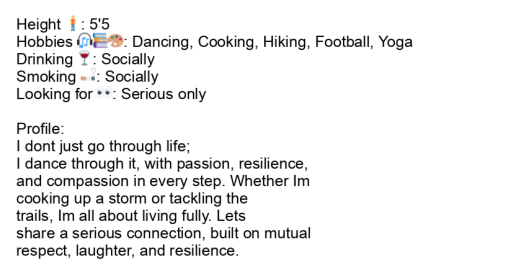

height = 6'2"
["Height 🧍: 5'5", 'Hobbies 🎧📚🎨: Yoga, Swimming, Painting, Running, Cooking ', 'Drinking 🍷: Socially', 'Smoking 🚬: Socially', 'Looking for 👀: Something casual ', '', 'Profile:', 'I live for the perfect balancewhether ', 'Im unwinding in yoga, diving into a ', 'painting, or running my way through lifes ', 'challenges. I value sincerity and charm, especially ', 'when shared over a meal or a ', 'quiet swim. If youre looking for something ', 'casual, Im all about enjoying the simple ', 'joys of life with no strings attached.']
Using custom font


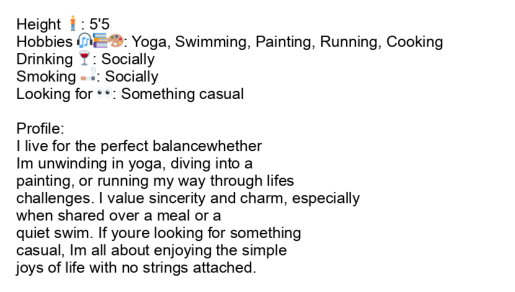

height = 5'11"
["Height 🧍: 5'11", 'Hobbies 🎧📚🎨: Cooking, Soccer, Baking, Gaming, Drawing ', 'Drinking 🍷: Often', 'Smoking 🚬: Often', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Im a creative and curious individual ', 'who loves experimenting in the kitchen, whether ', 'Im baking cookies or perfecting a new ', 'recipe. When Im not on the soccer ', 'field or getting lost in a game, ', 'I enjoy expressing myself through drawing. Im ', 'seeking something somewhat serious, where we can ', 'connect on a deeper level while still ', 'keeping things fresh and exciting.']
Using custom font


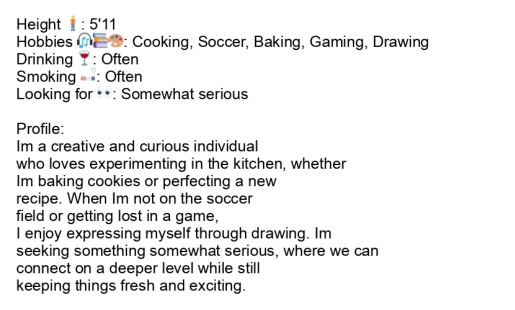

height = 5'11"
["Height 🧍: 5'11", 'Hobbies 🎧📚🎨: Painting, Dancing, Football, Reading, Singing ', 'Drinking 🍷: Never', 'Smoking 🚬: Rarely', 'Looking for 👀: Serious only ', '', 'Profile:', 'My life is a beautiful balance ', 'of creativity and calmwhether Im painting, dancing, ', 'or simply reading a good book. Im ', 'someone who enjoys life at a relaxed ', 'pace, taking time to truly appreciate the ', "things that matter. If you're looking for ", 'something serious, Im ready to connect with ', 'someone who values sincerity and authenticity, where ', 'we can build something real and meaningful.']
Using custom font


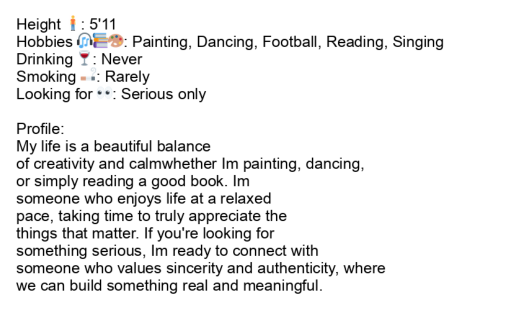

height = 5'11"
["Height 🧍: 5'11", 'Hobbies 🎧📚🎨: Coding, Reading, Hiking, Singing, Basketball ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Never', 'Looking for 👀: Something casual ', '', 'Profile:', 'Im someone who likes to keep ', 'activewhether its hiking or playing basketball. I ', 'like to read and code when I ', 'need some quiet time. Im open to ', 'something casual, and I value kindness and ', 'resilience.']
Using custom font


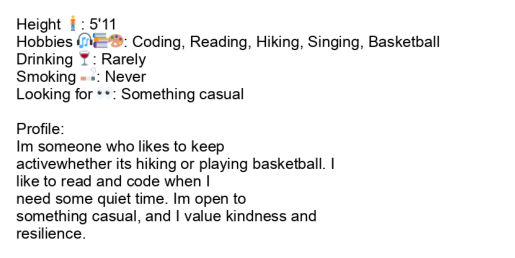

height = 5'11"
["Height 🧍: 5'11", 'Hobbies 🎧📚🎨: Writing, Soccer, Gaming, Swimming, Yoga ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Never', 'Looking for 👀: Serious only ', '', 'Profile:', 'Im an adventurer at heart, whether ', 'Im out on the soccer field, diving ', 'into a new writing project, or discovering ', 'the depths of yoga. I approach life ', 'with a compassionate mindset, always open to ', 'new experiences. If youre looking for something ', 'serious, lets create a partnership built on ', 'shared adventures and meaningful connections.']
Using custom font


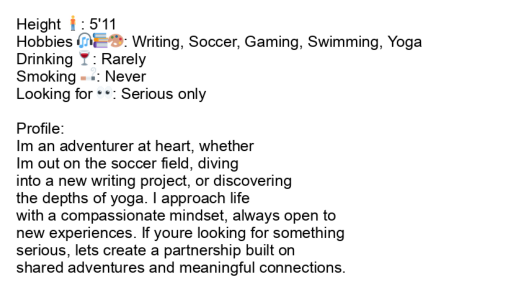

height = 6'0"
["Height 🧍: 5'7", 'Hobbies 🎧📚🎨: Meditation, Musician, Baking, Gaming, Hiking ', 'Drinking 🍷: Often', 'Smoking 🚬: Socially', 'Looking for 👀: Serious only ', '', 'Profile:', 'Sarcastic humor and deep conversations are ', 'my jam, whether Im hiking up a ', 'mountain or experimenting in the kitchen. Bold ', 'and unafraid to speak my mind, Im ', 'looking for something serious where we can ', 'connect on all levelswithout taking life too ', 'seriously.']
Using custom font


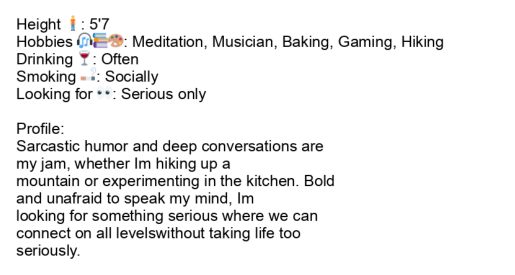

height = 6'0"
["Height 🧍: 5'7", 'Hobbies 🎧📚🎨: Painting, Hiking, Baking, Yoga, Meditation ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Often', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'I enjoy simple pleasures like painting, ', 'hiking, and trying out new baking recipes. ', 'Im usually calm and thoughtful, with a ', 'bit of humor to lighten the mood. ', 'Im looking for something somewhat serious, but ', 'with no rush.']
Using custom font


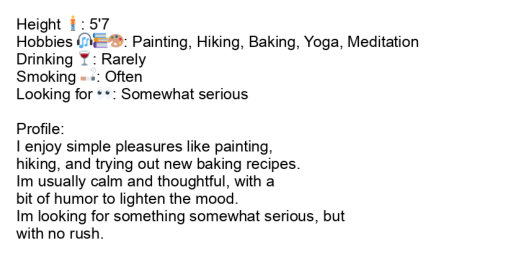

height = 6'1"
["Height 🧍: 5'6", 'Hobbies 🎧📚🎨: Swimming, Cooking, Soccer, Yoga, Meditation ', 'Drinking 🍷: Socially', 'Smoking 🚬: Often', 'Looking for 👀: Serious only ', '', 'Profile:', 'Whether its a swim in the ', 'pool or a yoga session, I like ', 'to keep things movingphysically and mentally. With ', 'a charm that comes naturally and a ', 'witty sense of humor, Im looking for ', 'a serious relationship where we can balance ', 'lifes challenges with a smile.']
Using custom font


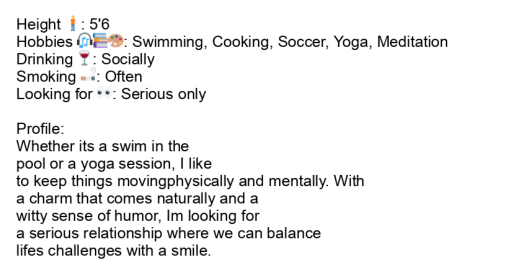

height = 6'0"
["Height 🧍: 5'7", 'Hobbies 🎧📚🎨: Basketball, Coding, Writing, Drawing, Musician ', 'Drinking 🍷: Never', 'Smoking 🚬: Often', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Im the kind of person who ', 'thrives in multiple worldswhether its shooting hoops ', 'or sketching out ideas. Humor and creativity ', 'are my goto tools for navigating life, ', 'and Im looking for someone who can ', 'match my quick wit and embrace both ', 'the quiet and lively moments. Lets see ', 'where we can go with some clever ', 'conversation and shared passions.']
Using custom font


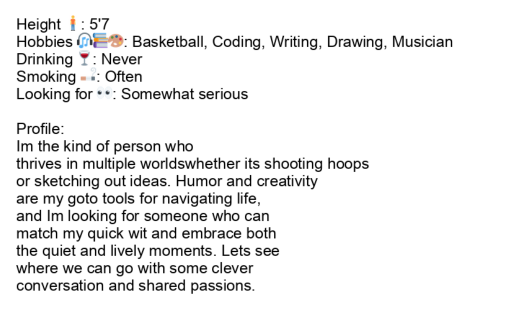

height = 6'0"
["Height 🧍: 5'7", 'Hobbies 🎧📚🎨: Singing, Reading, Baking, Gaming, Musician ', 'Drinking 🍷: Never', 'Smoking 🚬: Socially', 'Looking for 👀: Something casual ', '', 'Profile:', 'Im someone who enjoys the simpler ', 'things in life, like singing, reading, and ', 'baking when Im not getting lost in ', 'a good game or strumming my guitar. ', 'I prefer to take things easy and ', 'keep things relaxed, and I appreciate connecting ', 'with others who share a laidback outlook. ', 'While Im all about keeping it casual, ', 'Im also the kind of person who ', 'values understanding and empathy, making sure that ', 'those around me feel heard and cared ', 'for.']
Using custom font


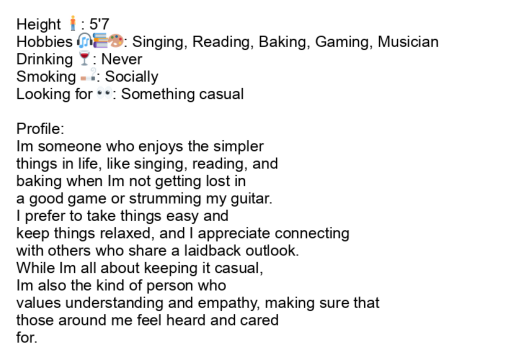

height = 6'1"
["Height 🧍: 5'6", 'Hobbies 🎧📚🎨: Musician, Reading, Coding, Swimming, Basketball ', 'Drinking 🍷: Socially', 'Smoking 🚬: Often', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Im someone who loves diving deep ', 'into my passionswhether its coding a new ', 'project, playing an instrument, or exploring a ', 'good book. Im introspective, but I also ', 'dont shy away from a bit of ', 'sarcastic humor to keep things interesting. If ', 'youre looking for something somewhat serious, lets ', 'connect and see where our shared interests ', 'and witty banter can take us.']
Using custom font


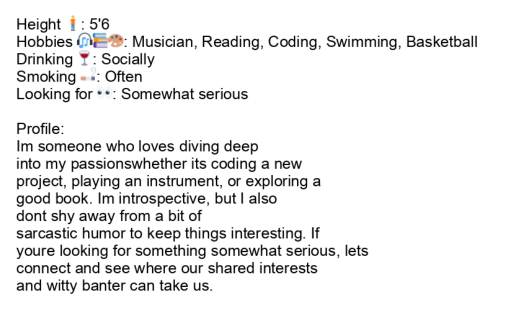

height = 6'1"
["Height 🧍: 5'6", 'Hobbies 🎧📚🎨: Dancing, Swimming, Hiking, Football, Reading ', 'Drinking 🍷: Never', 'Smoking 🚬: Often', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Im a compassionate soul who finds ', 'peace in dancing, swimming, and reading. While ', 'Im always up for an adventure, I ', 'also appreciate the quiet moments in life. ', 'Im looking for something somewhat serioussomeone who ', 'can connect with me on a deeper ', 'level, where we can share both our ', 'passions and our vulnerabilities.']
Using custom font


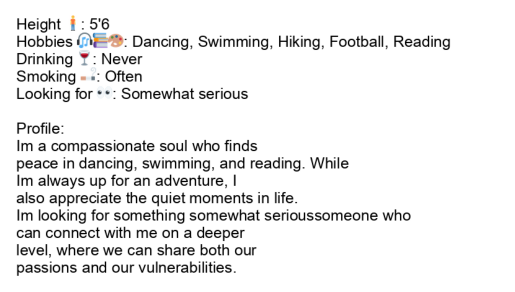

height = 5'11"
["Height 🧍: 5'11", 'Hobbies 🎧📚🎨: Coding, Reading, Writing, Gaming, Drawing ', 'Drinking 🍷: Socially', 'Smoking 🚬: Often', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'A bold and sarcastic creator, I ', "dive into coding and drawing like it's ", 'an art form. If youre interested in ', 'a somewhat serious relationship where we can ', 'inspire and challenge each other, lets make ', 'some creative sparks fly!']
Using custom font


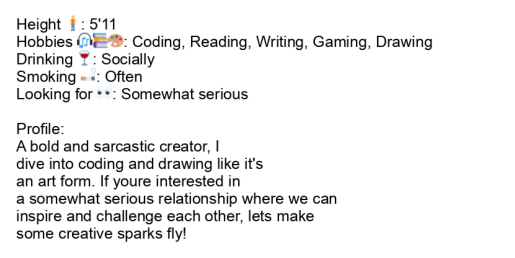

height = 6'2"
["Height 🧍: 5'5", 'Hobbies 🎧📚🎨: Writing, Drawing, Football, Cooking, Musician ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Often', 'Looking for 👀: Something casual ', '', 'Profile:', 'Charming and resilient, I juggle my ', 'time between the football field and the ', 'kitchen, creating culinary masterpieces. If youre looking ', 'for something casual, lets whip up some ', 'fun and share stories that keep us ', 'smiling!']
Using custom font


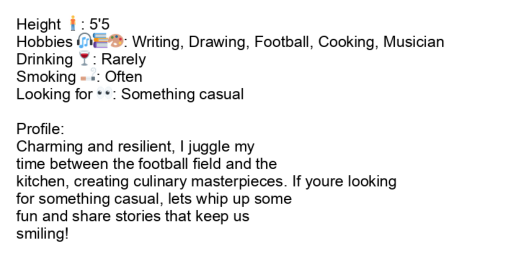

height = 5'11"
["Height 🧍: 5'11", 'Hobbies 🎧📚🎨: Running, Gaming, Writing, Reading, Yoga ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Often', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'My life is a mix of ', 'quiet reflection and active pursuits. Whether Im ', 'running or curled up with a good ', 'book, Im all about finding the balance. ', 'I value connection and depth, and Im ', 'looking for someone who can match my ', 'laidback vibe but is also ready to ', 'dive into real conversations about what matters ', 'most.']
Using custom font


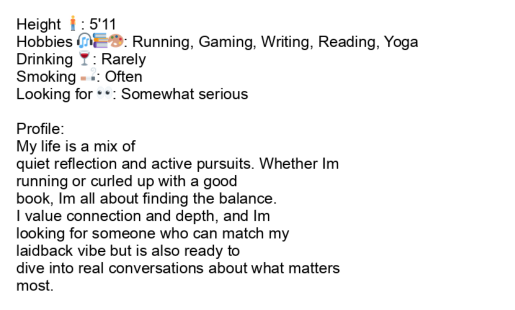

height = 5'11"
["Height 🧍: 5'11", 'Hobbies 🎧📚🎨: Dancing, Gaming, Cooking, Reading, Baking ', 'Drinking 🍷: Socially', 'Smoking 🚬: Rarely', 'Looking for 👀: Something casual ', '', 'Profile:', 'An empathetic soul with a flair ', 'for the dramatic, I thrive on creativitybe ', 'it through dancing, gaming, or whipping up ', 'delicious baked goods. If youre looking for ', "something casual, let's share some laughs and ", 'enjoy lifes little adventures together!']
Using custom font


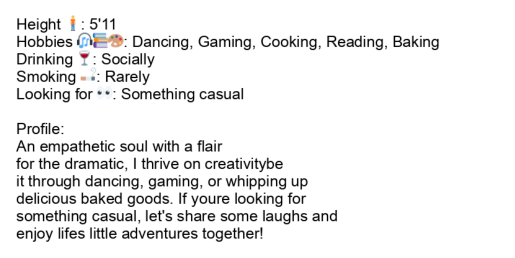

height = 6'2"
["Height 🧍: 5'5", 'Hobbies 🎧📚🎨: Football, Singing, Gaming, Dancing, Yoga ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Socially', 'Looking for 👀: Serious only ', '', 'Profile:', 'Im a confident and bold woman ', 'who loves a good challengewhether its on ', 'the football field, belting out a song, ', 'or dancing the night away. I embrace ', 'life with a sense of adventure but ', 'always keep things grounded with a laidback ', "attitude. If you're looking for a serious ", 'connection, Id love to share in some ', 'meaningful moments and explore the depths of ', 'life with someone who isnt afraid to ', 'be bold and real.']
Using custom font


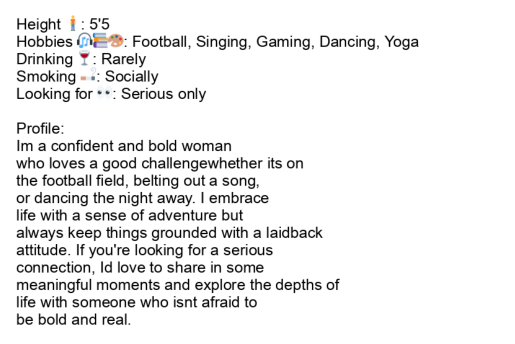

height = 6'1"
["Height 🧍: 5'6", 'Hobbies 🎧📚🎨: Yoga, Singing, Meditation, Reading, Baking ', 'Drinking 🍷: Socially', 'Smoking 🚬: Often', 'Looking for 👀: Something casual ', '', 'Profile:', 'Whether Im baking a fresh batch ', 'of cookies or singing my heart out, ', 'Im all about being present in the ', 'moment. Thoughtful and empathetic, I seek a ', 'connection thats genuine but lowpressure. If youre ', 'up for a laidback vibe with a ', 'dash of depth, lets connect.']
Using custom font


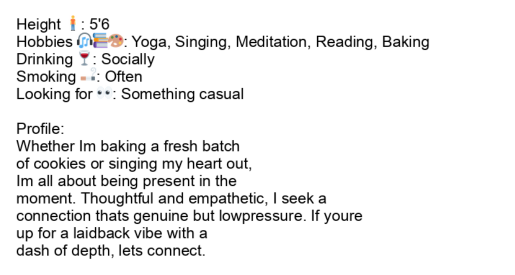

height = 6'2"
["Height 🧍: 5'5", 'Hobbies 🎧📚🎨: Meditation, Yoga, Football, Dancing, Reading ', 'Drinking 🍷: Socially', 'Smoking 🚬: Often', 'Looking for 👀: Serious only ', '', 'Profile:', 'I find my peace through meditation ', 'and my strength in football, but its ', 'the thoughtful conversations and perceptive connections that ', 'truly fuel me. Whether Im dancing or ', 'reading, Im all about embracing the depth ', 'of life. Looking for something serious, where ', 'we can explore both the stillness and ', 'the excitement of the world together.']
Using custom font


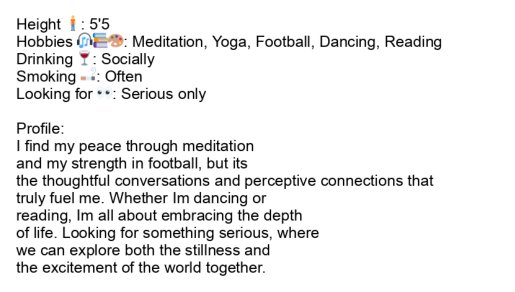

height = 5'10"
["Height 🧍: 5'10", 'Hobbies 🎧📚🎨: Writing, Dancing, Drawing, Basketball, Yoga ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Often', 'Looking for 👀: Something casual ', '', 'Profile:', 'A curious and bold individual, Im ', 'always on the lookout for new stories ', 'to tell and adventures to embark on. ', 'If youre open to something casual, lets ', 'dance through life together and create some ', 'unforgettable memories!']
Using custom font


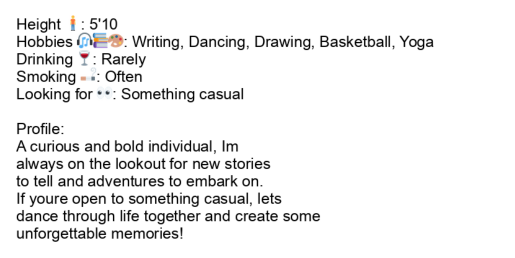

height = 5'9"
["Height 🧍: 5'9", 'Hobbies 🎧📚🎨: Soccer, Painting, Reading, Musician, Writing ', 'Drinking 🍷: Often', 'Smoking 🚬: Never', 'Looking for 👀: Serious only ', '', 'Profile:', 'If theres one thing I know, ', 'its that lifes too short not to ', 'embrace both the sarcastic side and the ', 'serious one. Whether Im sketching on a ', 'canvas, reading a novel, or writing my ', 'thoughts, I balance creativity with intellect. Ready ', 'for something serious? Lets laugh, debate, and ', 'see where it takes us.']
Using custom font


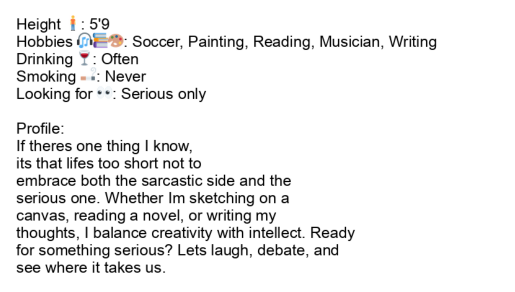

height = 6'1"
["Height 🧍: 5'6", 'Hobbies 🎧📚🎨: Writing, Musician, Cooking, Hiking, Gaming ', 'Drinking 🍷: Never', 'Smoking 🚬: Socially', 'Looking for 👀: Something casual ', '', 'Profile:', 'Im the kind of person who ', 'finds meaning in the small thingsa wellcooked ', 'meal, a quiet hike, or the perfect ', 'chord on my guitar. Empathetic and perceptive, ', 'I connect deeply, but Im also here ', 'for something casual. If youre ready to ', 'share meaningful moments without the weight of ', 'expectations, lets make it happen.']
Using custom font


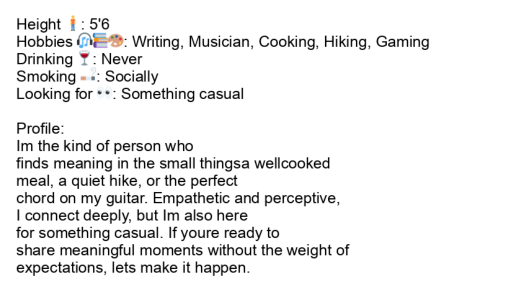

height = 5'8"
["Height 🧍: 5'8", 'Hobbies 🎧📚🎨: Baking, Hiking, Gaming, Musician, Meditation ', 'Drinking 🍷: Often', 'Smoking 🚬: Socially', 'Looking for 👀: Something casual ', '', 'Profile:', 'Whether Im baking a new recipe ', 'or conquering a new hiking trail, I ', 'live life with a playful spirit and ', 'a fiery passion. Gaming and meditation bring ', 'balance to my world, but I never ', 'shy away from a good laugh. Looking ', 'for something casual, where we can enjoy ', 'the fun of the moment while leaving ', 'room for adventure.']
Using custom font


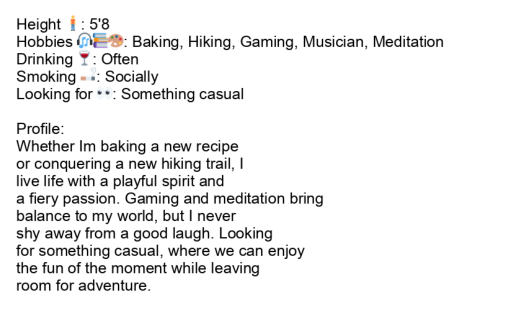

height = 5'9"
["Height 🧍: 5'9", 'Hobbies 🎧📚🎨: Yoga, Soccer, Drawing, Meditation, Cooking ', 'Drinking 🍷: Often', 'Smoking 🚬: Never', 'Looking for 👀: Something casual ', '', 'Profile:', 'Whether Im stretching on my mat ', 'or making a mess in the kitchen, ', 'I approach life with a blend of ', 'charm and a playful attitude. A lover ', 'of yoga, soccer, and everything in between, ', 'Im seeking something casuallets share a laugh, ', 'enjoy the simple moments, and see where ', 'the journey takes us.']
Using custom font


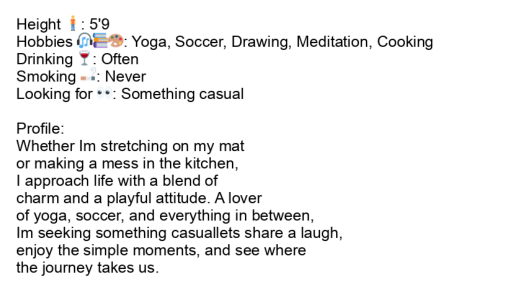

height = 5'8"
["Height 🧍: 5'8", 'Hobbies 🎧📚🎨: Yoga, Musician, Coding, Cooking, Dancing ', 'Drinking 🍷: Socially', 'Smoking 🚬: Never', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Lifes an open canvas, and I ', 'paint it with melodies from my instrument, ', 'the rhythmic flow of yoga, and a ', 'few wellcoded lines. Deep thinker by nature ', 'and always curious, I love exploring new ', 'ideas and savoring lifes little moments. Lets ', 'see where a spark of meaningful connection ', 'can take ussomething serious, but with room ', 'for adventure.']
Using custom font


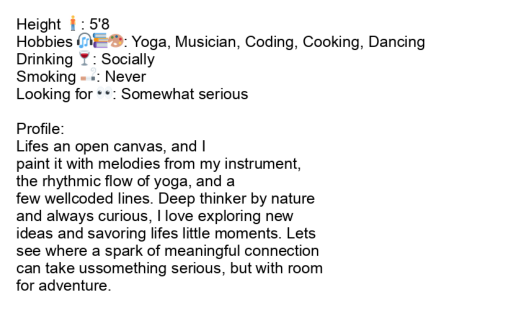

height = 5'10"
["Height 🧍: 5'10", 'Hobbies 🎧📚🎨: Cooking, Painting, Drawing, Singing, Dancing ', 'Drinking 🍷: Never', 'Smoking 🚬: Socially', 'Looking for 👀: Something casual ', '', 'Profile:', 'Im a curious and compassionate person ', 'who loves exploring new recipes, painting, and ', 'singing. Dancing adds a little rhythm to ', 'my life, and Im always up for ', 'learning something new. If youre looking for ', 'something casual, Im open to connecting with ', 'someone who shares my love for creativity ', 'and discovery while keeping things light and ', 'fun.']
Using custom font


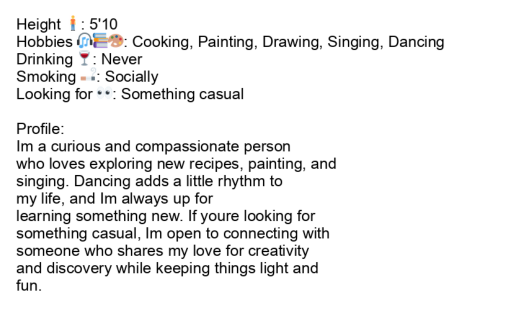

height = 5'11"
["Height 🧍: 5'11", 'Hobbies 🎧📚🎨: Coding, Reading, Basketball, Soccer, Cooking ', 'Drinking 🍷: Never', 'Smoking 🚬: Socially', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Lifes about finding the right mixwhether ', 'its coding, cooking, or playing basketball. I ', 'enjoy the challenges and the quiet moments. ', 'If you love thoughtful conversations and a ', 'good laugh, Im looking for a somewhat ', 'serious relationship that can blend our lives ', 'in the most delightful way.']
Using custom font


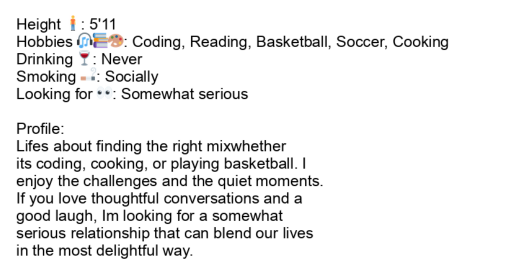

height = 5'8"
["Height 🧍: 5'8", 'Hobbies 🎧📚🎨: Reading, Dancing, Meditation, Swimming, Basketball ', 'Drinking 🍷: Often', 'Smoking 🚬: Never', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Im a compassionate and creative spirit ', 'who loves to dance through life! Whether ', 'Im swimming laps or getting lost in ', 'a good book, I believe in living ', 'life to the fullest. Seeking a somewhat ', 'serious relationship where we can share our ', 'dreams and creativity.']
Using custom font


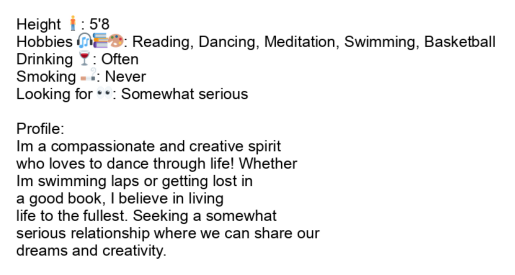

['Height 🧍: 6\'0"', 'Hobbies 🎧📚🎨: Cooking, Yoga, Painting, Musician, Drawing ', 'Drinking 🍷: Never', 'Smoking 🚬: Socially', 'Looking for 👀: Serious only ', '', 'Profile:', 'Life is bold and full of ', 'flavor, just like my favorite recipes! I ', 'thrive on thoughtful discussions and deep dives ', 'into art, from cooking to painting. If ', 'youre all about new ideas, meaningful connections, ', 'and a relationship thats as adventurous as ', 'it is grounded, lets see where it ', 'goes.']
Using custom font


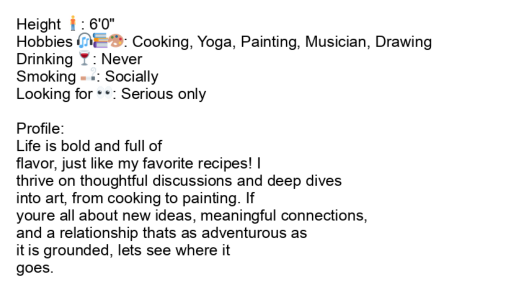

['Height 🧍: 5\'8"', 'Hobbies 🎧📚🎨: Basketball, Meditation, Gaming, Singing, Drawing ', 'Drinking 🍷: Socially', 'Smoking 🚬: Never', 'Looking for 👀: Something casual ', '', 'Profile:', 'A witty mix of athletic energy, ', 'creative flow, and zen vibes. I thrive ', 'in the balance of court, console, and ', 'canvas. If youre up for a casual ', 'vibe with someone who can keep the ', 'conversation as lively as the game, Im ', 'your match.']
Using custom font


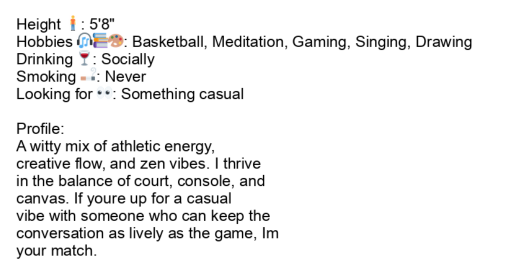

['Height 🧍: 5\'10"', 'Hobbies 🎧📚🎨: Hiking, Soccer, Gaming, Singing, Musician ', 'Drinking 🍷: Often', 'Smoking 🚬: Never', 'Looking for 👀: Serious only ', '', 'Profile:', 'Driven by curiosity and passion, I ', 'thrive on the adrenaline of hiking and ', 'the teamwork of soccer. Gaming and singing ', 'offer creative outlets, and playing an instrument ', 'lets me explore my artistic side. Im ', 'seeking a serious relationship with someone who ', 'shares my love for adventure and exploration.']
Using custom font


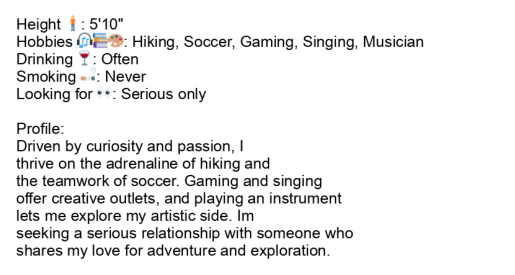

['Height 🧍: 5\'11"', 'Hobbies 🎧📚🎨: Football, Running, Meditation, Dancing, Cooking ', 'Drinking 🍷: Never', 'Smoking 🚬: Often', 'Looking for 👀: Something casual ', '', 'Profile:', 'Im known for my resilience and ', 'a sharp, sarcastic wit. Football, running, and ', 'dancing keep me active, while cooking brings ', 'out my creative side. Im looking for ', 'something casual, with someone who can appreciate ', 'my humor and strength.']
Using custom font


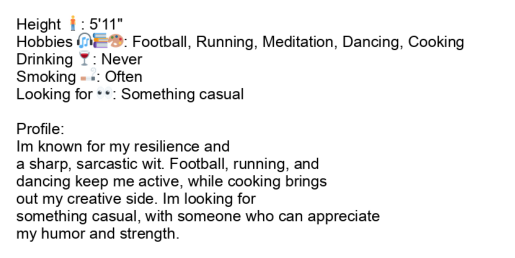

['Height 🧍: 5\'10"', 'Hobbies 🎧📚🎨: Coding, Baking, Football, Basketball, Meditation ', 'Drinking 🍷: Often', 'Smoking 🚬: Socially', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Im someone who finds joy in ', 'both tech and the art of baking. ', 'My resilience shows up on the football ', 'field, while meditation keeps me balanced. Im ', 'looking for a somewhat serious relationship with ', 'someone who appreciates a generous spirit and ', 'shared interests.']
Using custom font


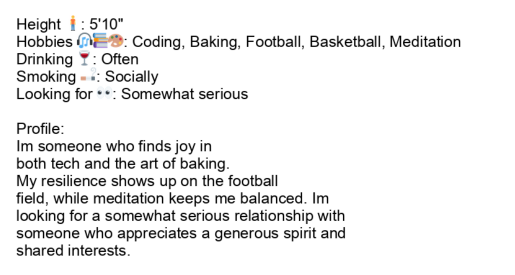

['Height 🧍: 5\'9"', 'Hobbies 🎧📚🎨: Drawing, Coding, Yoga, Football, Running ', 'Drinking 🍷: Often', 'Smoking 🚬: Rarely', 'Looking for 👀: Something casual ', '', 'Profile:', 'Im introspective and playful, with a ', 'love for drawing and coding. Yoga, football, ', 'and running keep me engaged, and I ', 'bring a mix of deep conversation and ', 'lightheartedness to every connection. Im open to ', 'something casual, hoping to find someone who ', 'values fun and reflection.']
Using custom font


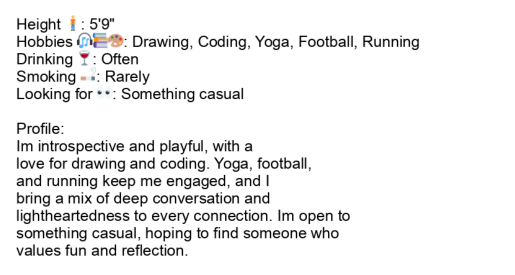

['Height 🧍: 6\'1"', 'Hobbies 🎧📚🎨: Coding, Painting, Hiking, Cooking, Dancing ', 'Drinking 🍷: Never', 'Smoking 🚬: Rarely', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Im introspective with a sarcastic edge, ', 'finding balance in the precise world of ', 'coding and the freedom of painting. Hiking ', 'and cooking keep me grounded, while dancing ', 'is my favorite way to unwind. Im ', 'looking for a somewhat serious relationship with ', 'someone who enjoys meaningful conversations and a ', 'good laugh.']
Using custom font


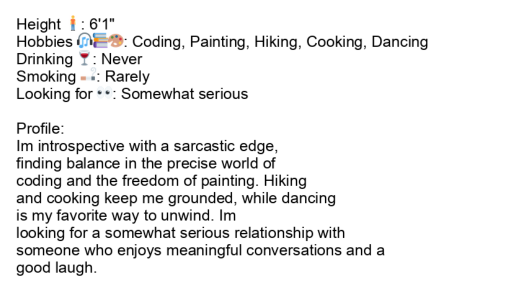

['Height 🧍: 6\'2"', 'Hobbies 🎧📚🎨: Coding, Painting, Reading, Swimming, Basketball ', 'Drinking 🍷: Often', 'Smoking 🚬: Often', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'With a balance of coding and ', 'painting, I stay intellectually and creatively active, ', 'and basketball adds excitement to the mix. ', 'Im seeking a somewhat serious connection where ', 'deep conversations and a shared passion for ', 'life can flourish.']
Using custom font


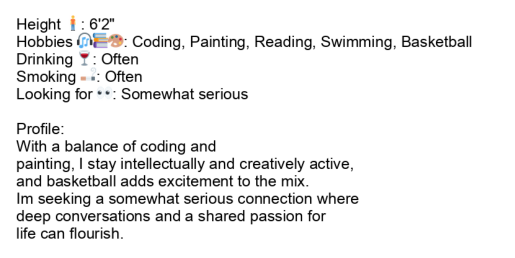

['Height 🧍: 5\'10"', 'Hobbies 🎧📚🎨: Writing, Yoga, Football, Soccer, Painting ', 'Drinking 🍷: Socially', 'Smoking 🚬: Often', 'Looking for 👀: Something casual ', '', 'Profile:', 'A lover of life with a ', 'creative side, I enjoy writing, yoga, and ', 'painting. Football and soccer fuel my competitive ', 'streak, and I bring optimism and passion ', 'into everything I do. Im open to ', 'a casual connection, hoping to find someone ', 'who shares my zest for life.']
Using custom font


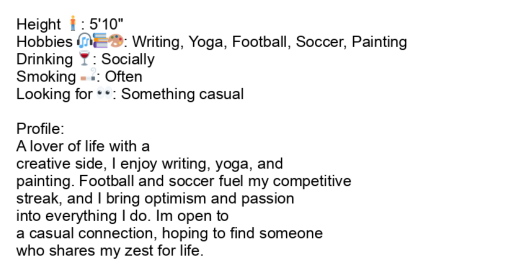

['Height 🧍: 5\'8"', 'Hobbies 🎧📚🎨: Reading, Singing, Basketball, Running, Swimming ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Never', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'A creative soul with a perceptive ', 'outlook, I find joy in reading and ', 'expressing myself through singing. Basketball and running ', 'keep me moving, while swimming offers peace. ', 'Im looking for a somewhat serious relationship ', 'with someone who appreciates lifes beauty and ', 'creativity.']
Using custom font


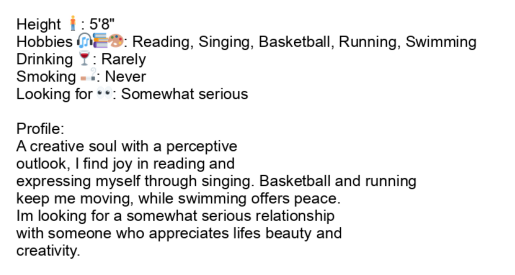

['Height 🧍: 5\'9"', 'Hobbies 🎧📚🎨: Yoga, Meditation, Writing, Dancing, Hiking ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Rarely', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'I find balance in the quiet ', 'momentswhether through meditation or a long hike. ', 'Dancing brings out my free spirit, and ', 'writing lets me explore the depths of ', 'my thoughts. Im drawn to deep conversations ', 'but also enjoy the thrill of adventure. ', 'Looking for someone to share in both ', 'the tranquility of life and its more ', 'daring escapades.']
Using custom font


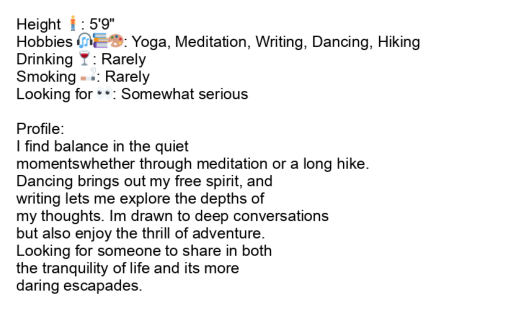

['Height 🧍: 6\'2"', 'Hobbies 🎧📚🎨: Yoga, Coding, Meditation, Running, Baking ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Rarely', 'Looking for 👀: Something casual ', '', 'Profile:', 'Im into yoga and meditation to ', 'keep my mind sharp, with coding, running, ', 'and baking as ways to stay engaged ', 'and creative. Looking for something casual, hoping ', 'to meet someone who shares my love ', 'for exploring and creativity.']
Using custom font


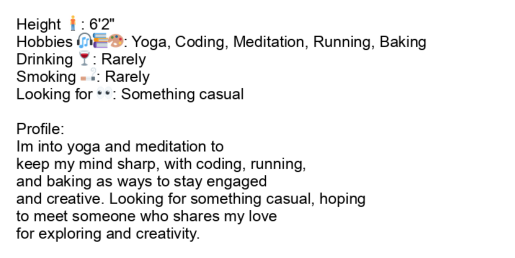

['Height 🧍: 6\'0"', 'Hobbies 🎧📚🎨: Baking, Drawing, Gaming, Coding, Dancing ', 'Drinking 🍷: Often', 'Smoking 🚬: Socially', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'With a mix of introspection and ', 'charm, I find joy in everything from ', 'gaming and drawing to dancing and coding. ', 'Baking is my way to relax, and ', 'Im looking for someone who loves to ', 'explore, whether its an interest or a ', 'connectionlets see where it goes.']
Using custom font


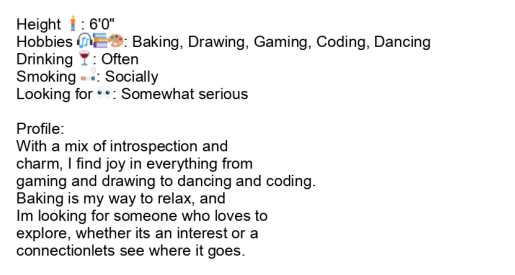

['Height 🧍: 5\'9"', 'Hobbies 🎧📚🎨: Baking, Hiking, Yoga, Soccer, Football ', 'Drinking 🍷: Socially', 'Smoking 🚬: Never', 'Looking for 👀: Something casual ', '', 'Profile:', 'Im someone who enjoys giving and ', 'connecting with people, whether through a hike, ', 'a soccer game, or a freshbaked treat. ', 'Yoga keeps me grounded, and my charm ', 'adds a spark to new encounters. Im ', 'interested in something casual with someone who ', 'values kindness and spontaneity.']
Using custom font


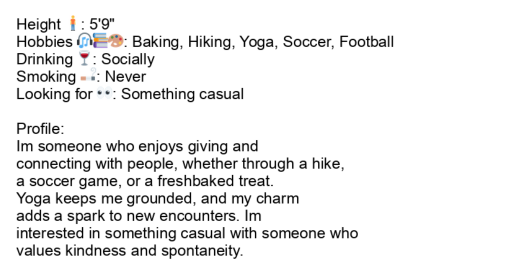

['Height 🧍: 5\'8"', 'Hobbies 🎧📚🎨: Painting, Singing, Drawing, Basketball, Writing ', 'Drinking 🍷: Often', 'Smoking 🚬: Socially', 'Looking for 👀: Something casual ', '', 'Profile:', 'As an empathetic and compassionate person, ', 'I find joy in painting and singing. ', 'Drawing and writing add depth to my ', 'creativity, and basketball keeps me moving. Im ', 'interested in something casual with someone who ', 'appreciates kindness and artistic expression.']
Using custom font


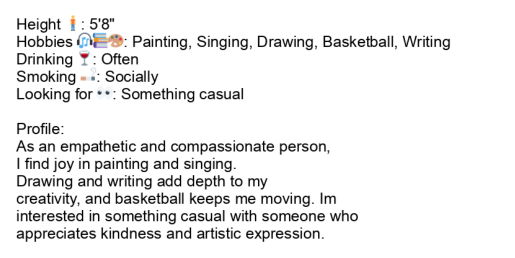

['Height 🧍: 6\'2"', 'Hobbies 🎧📚🎨: Meditation, Writing, Baking, Cooking, Drawing ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Rarely', 'Looking for 👀: Something casual ', '', 'Profile:', 'A bit of a free spirit, ', 'Im into staying grounded through meditation but ', 'always up for an adventure, whether its ', 'a new recipe or a good story. ', 'If youre spontaneous and enjoy savoring lifes ', 'moments, Im open to something casual and ', 'full of fun.']
Using custom font


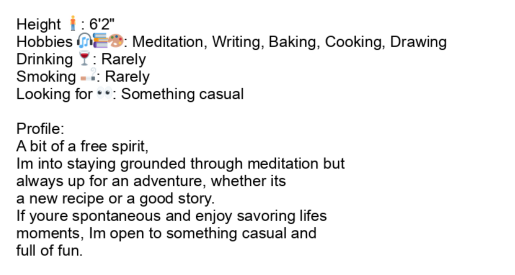

['Height 🧍: 5\'11"', 'Hobbies 🎧📚🎨: Dancing, Baking, Yoga, Painting, Writing ', 'Drinking 🍷: Often', 'Smoking 🚬: Often', 'Looking for 👀: Something casual ', '', 'Profile:', 'With charm and a playful spirit, ', 'I love dancing and baking. Yoga and ', 'painting keep me energized, and writing is ', 'my creative outlet. Im looking for something ', 'casual with someone who appreciates a mix ', 'of fun and spontaneity.']
Using custom font


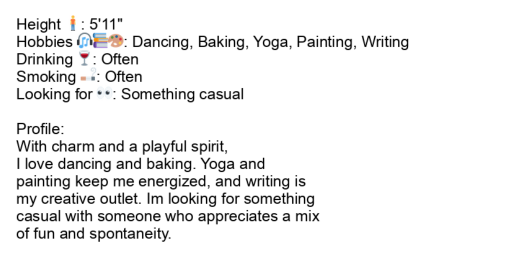

['Height 🧍: 5\'9"', 'Hobbies 🎧📚🎨: Coding, Writing, Singing, Gaming, Soccer ', 'Drinking 🍷: Never', 'Smoking 🚬: Often', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Whether its coding or singing, I ', 'bring boldness and heart into everything I ', 'do. Im looking for a somewhat serious ', 'relationship with someone who values kindness and ', 'isnt afraid to live with intensity and ', 'purpose.']
Using custom font


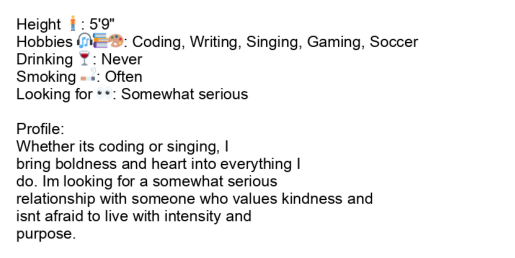

['Height 🧍: 5\'10"', 'Hobbies 🎧📚🎨: Baking, Painting, Running, Musician, Swimming ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Often', 'Looking for 👀: Serious only ', '', 'Profile:', 'Thoughtful and open, I like the ', 'simple pleasure of a good run, a ', 'song, or a creative bake. Running and ', 'swimming are my outlets, and Id love ', 'to meet someone who values genuine connection ', 'and a life filled with shared moments.']
Using custom font


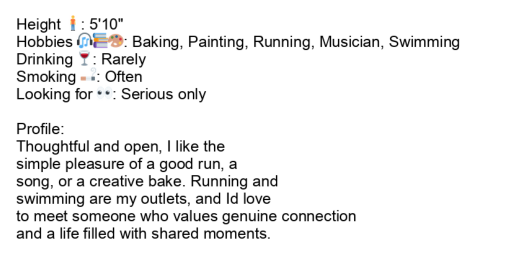

['Height 🧍: 6\'1"', 'Hobbies 🎧📚🎨: Singing, Gaming, Meditation, Reading, Coding ', 'Drinking 🍷: Often', 'Smoking 🚬: Socially', 'Looking for 👀: Something casual ', '', 'Profile:', 'Meditation and reading keep me grounded, ', 'while gaming and coding give me space ', 'for thought and fun. Im seeking something ', 'casual with someone who loves humor and ', 'can appreciate both deep discussions and lighthearted ', 'moments.']
Using custom font


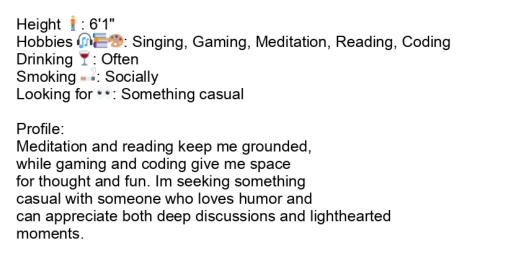

['Height 🧍: 6\'1"', 'Hobbies 🎧📚🎨: Meditation, Dancing, Yoga, Writing, Drawing ', 'Drinking 🍷: Often', 'Smoking 🚬: Rarely', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Im someone who values mindfulness and ', 'creative expression. Meditation and yoga give me ', 'peace, and dancing, writing, and drawing let ', 'me express my empathy and thoughtfulness. Im ', 'interested in a somewhat serious relationship with ', 'someone who appreciates deep connections and shared ', 'goals.']
Using custom font


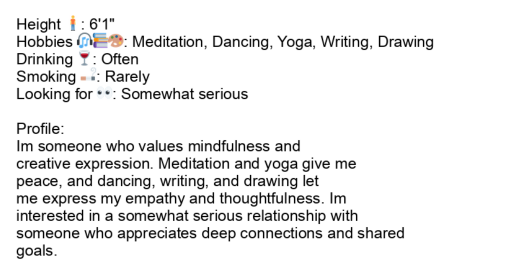

['Height 🧍: 6\'0"', 'Hobbies 🎧📚🎨: Running, Meditation, Writing, Musician, Cooking ', 'Drinking 🍷: Socially', 'Smoking 🚬: Rarely', 'Looking for 👀: Serious only ', '', 'Profile:', 'With a laidback attitude and a ', 'resilient spirit, I find joy in the ', 'rhythm of running and the calm of ', 'meditation. Writing and playing an instrument are ', 'my creative escapes, while cooking keeps me ', 'grounded. Im looking for a serious relationship ', 'where we can share our passions and ', 'support each other through lifes ups and ', 'downs.']
Using custom font


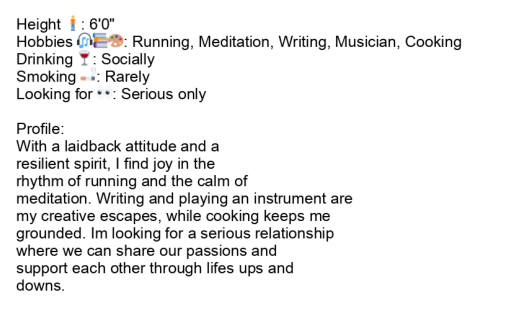

['Height 🧍: 5\'9"', 'Hobbies 🎧📚🎨: Yoga, Cooking, Basketball, Writing, Coding ', 'Drinking 🍷: Socially', 'Smoking 🚬: Often', 'Looking for 👀: Something casual ', '', 'Profile:', 'Balancing yoga and the thrill of ', 'cooking and basketball, I find my creative ', 'side in writing and coding. Im open ', 'to something casual with someone who appreciates ', 'thoughtful connections and the insight that comes ', 'from shared experiences.']
Using custom font


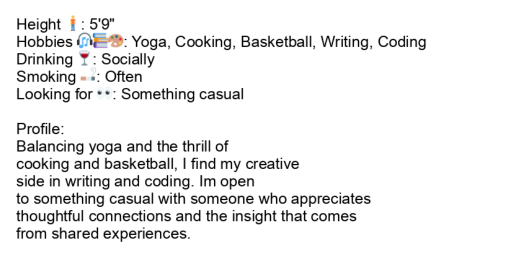

['Height 🧍: 5\'9"', 'Hobbies 🎧📚🎨: Football, Dancing, Cooking, Singing, Soccer ', 'Drinking 🍷: Often', 'Smoking 🚬: Socially', 'Looking for 👀: Serious only ', '', 'Profile:', 'Whether Im cooking up something new, ', 'dancing my heart out, or hitting the ', 'field, I pour my whole self into ', 'whatever I do. Im introspective but full ', 'of energy, and Im ready for a ', 'serious connection with someone whos inspired by ', 'creativity and lives life with soul.']
Using custom font


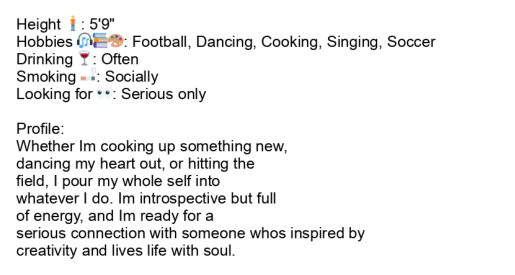

['Height 🧍: 5\'9"', 'Hobbies 🎧📚🎨: Meditation, Running, Gaming, Writing, Swimming ', 'Drinking 🍷: Never', 'Smoking 🚬: Often', 'Looking for 👀: Serious only ', '', 'Profile:', 'My curious mind and bold nature ', 'lead me to meditation for peace and ', 'running for exhilaration. Gaming and writing let ', 'me explore new worlds, while swimming is ', 'my favorite way to unwind. Im seeking ', 'a serious relationship with someone who dreams ', 'big and embraces bold aspirations.']
Using custom font


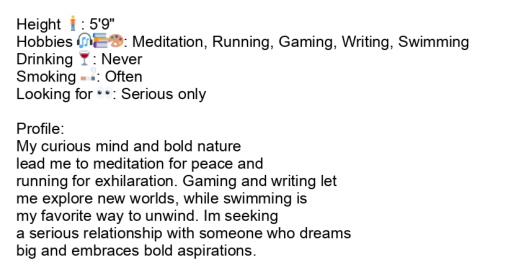

['Height 🧍: 5\'10"', 'Hobbies 🎧📚🎨: Reading, Singing, Coding, Painting, Yoga ', 'Drinking 🍷: Socially', 'Smoking 🚬: Never', 'Looking for 👀: Serious only ', '', 'Profile:', 'Im all about diving into a ', 'good book or coding a new project, ', 'with painting and yoga as my creative ', 'outlets. Im looking for a serious connection ', 'with someone who shares a love for ', 'lifes depth and the passion to make ', 'it vibrant.']
Using custom font


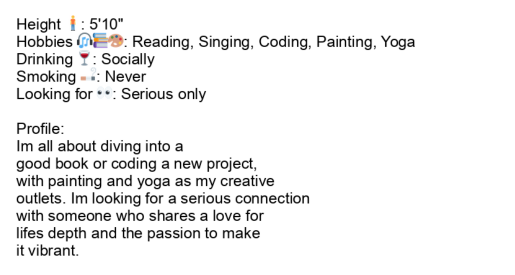

['Height 🧍: 6\'0"', 'Hobbies 🎧📚🎨: Swimming, Painting, Drawing, Gaming, Baking ', 'Drinking 🍷: Socially', 'Smoking 🚬: Often', 'Looking for 👀: Serious only ', '', 'Profile:', 'With a blend of wit and ', 'resilience, I enjoy the tranquility of swimming ', 'and the artistry of painting and drawing. ', 'Gaming brings excitement, and baking is a ', 'passion of mine. Im seeking a serious ', 'relationship with someone who values humor and ', 'perseverance in life.']
Using custom font


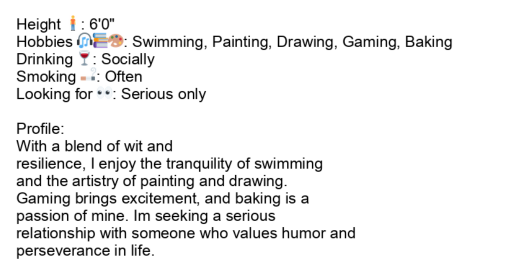

['Height 🧍: 5\'9"', 'Hobbies 🎧📚🎨: Basketball, Reading, Yoga, Coding, Writing ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Socially', 'Looking for 👀: Serious only ', '', 'Profile:', 'I bring a bit of charm ', 'and a whole lot of generosity into ', 'everything I do, from the court to ', 'creative projects. Coding and writing are where ', 'I dive deep, while yoga and basketball ', 'keep my feet on the ground. Looking ', 'for someone whos into serious connection and ', 'values good conversations as much as a ', 'good laugh.']
Using custom font


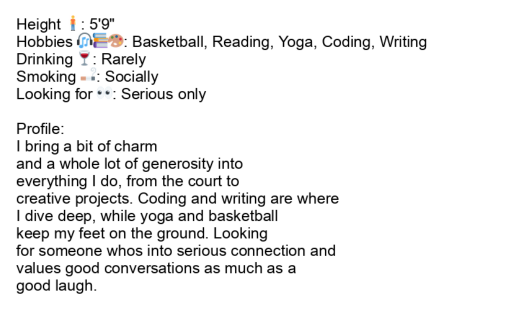

['Height 🧍: 5\'11"', 'Hobbies 🎧📚🎨: Singing, Musician, Reading, Dancing, Coding ', 'Drinking 🍷: Never', 'Smoking 🚬: Rarely', 'Looking for 👀: Something casual ', '', 'Profile:', 'Between singing and playing music, I ', 'find peace and joy. Reading and dancing ', 'lift my spirit, while coding keeps me ', 'curious and adaptable. Im looking for something ', 'casual with someone who enjoys lifes simple ', 'pleasures and isnt afraid of change.']
Using custom font


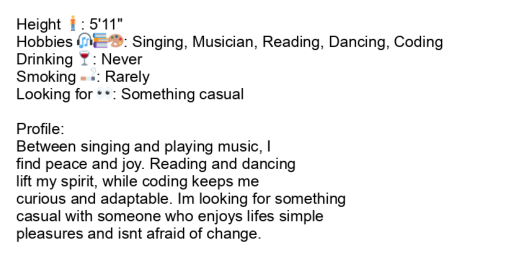

['Height 🧍: 5\'10"', 'Hobbies 🎧📚🎨: Meditation, Cooking, Musician, Drawing, Singing ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Socially', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Playful by nature, generous at heart. ', 'Im the kind of person who finds ', 'joy in lifes rhythmswhether its cooking a ', 'meal, strumming a tune, or finding calm ', 'in meditation. Im looking for someone who ', 'values kindness, connection, and a good laugh.']
Using custom font


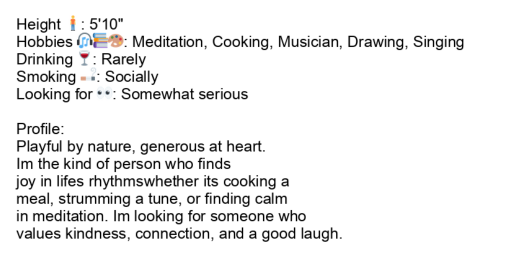

['Height 🧍: 5\'11"', 'Hobbies 🎧📚🎨: Drawing, Basketball, Yoga, Dancing, Gaming ', 'Drinking 🍷: Often', 'Smoking 🚬: Rarely', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Thoughtful with a sarcastic edge, I ', 'love balancing art and action. Whether its ', 'shooting hoops or losing myself in a ', 'new drawing, Im here to keep things ', 'vibrant and grounded. Looking for someone who ', 'appreciates humor with a side of realnesscome ', 'join the fun and see if we ', 'click.']
Using custom font


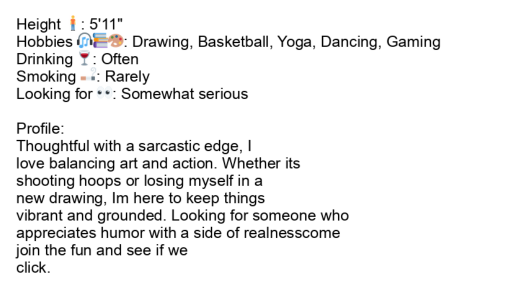

['Height 🧍: 5\'9"', 'Hobbies 🎧📚🎨: Football, Swimming, Gaming, Musician, Dancing ', 'Drinking 🍷: Rarely', 'Smoking 🚬: Rarely', 'Looking for 👀: Serious only ', '', 'Profile:', 'Football and swimming fuel my energy, ', 'and gaming and music give me a ', 'chance to express my creative side. Im ', 'looking for a serious relationship where we ', 'can share fun, understanding, and a bit ', 'of thoughtful humor.']
Using custom font


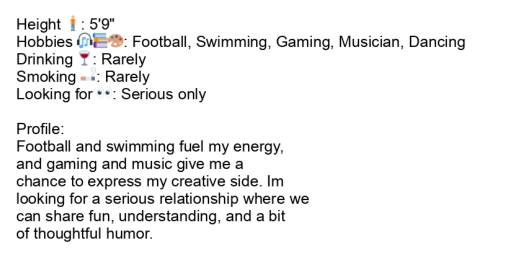

['Height 🧍: 5\'10"', 'Hobbies 🎧📚🎨: Hiking, Soccer, Meditation, Running, Reading ', 'Drinking 🍷: Socially', 'Smoking 🚬: Never', 'Looking for 👀: Serious only ', '', 'Profile:', 'Lifes a hike, and Im here ', 'for the view and the company. Analyzing ', 'the world is my game, but empathy ', 'is my drive. Whether its finding peace ', 'on a mountain trail or getting lost ', 'in a book, Im all about depth ', 'and discovery. Ready for a partner who ', 'seeks something real, rooted, and refreshingly honest.']
Using custom font


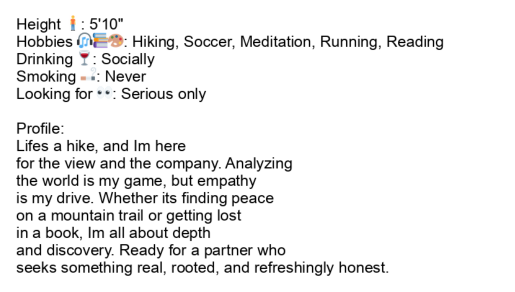

['Height 🧍: 5\'8"', 'Hobbies 🎧📚🎨: Hiking, Yoga, Running, Football, Reading ', 'Drinking 🍷: Often', 'Smoking 🚬: Never', 'Looking for 👀: Serious only ', '', 'Profile:', 'Im an adventurer at heart, happiest ', 'when Im out hiking a new trail, ', 'reading a fascinating book, or pushing myself ', 'through a good run. Empathy is at ', 'my core, and Im looking for a ', 'meaningful connection with someone whos equally curious ', 'about life and loves a good conversation.']
Using custom font


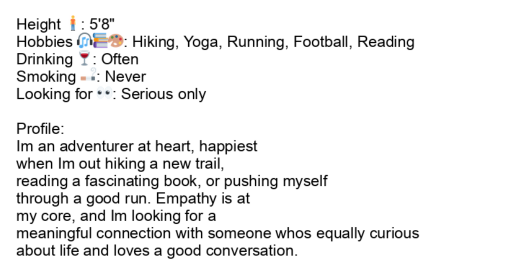

['Height 🧍: 5\'9"', 'Hobbies 🎧📚🎨: Yoga, Swimming, Drawing, Coding, Baking ', 'Drinking 🍷: Socially', 'Smoking 🚬: Socially', 'Looking for 👀: Serious only ', '', 'Profile:', 'With an eye for detail and ', 'a love for exploring creativity, I enjoy ', 'finding balance in life, from the calm ', 'of yoga to the precision of coding ', 'and the joy of baking. Looking for ', 'someone who shares a curious mind and ', 'an open heartlets explore all the little ', 'things that make life interesting.']
Using custom font


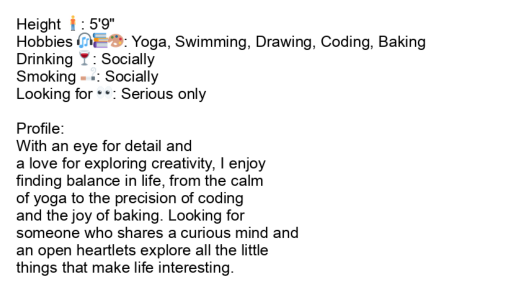

['Height 🧍: 6\'0"', 'Hobbies 🎧📚🎨: Baking, Yoga, Dancing, Writing, Football ', 'Drinking 🍷: Socially', 'Smoking 🚬: Rarely', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'between baking something sweet and grounding ', 'myself with yoga, or capturing thoughts through ', 'writing and getting a little wild on ', 'the dance floor. Im a thoughtful soul ', 'looking for someone sincere and ready for ', 'a relationship thats fun, grounded, and real.']
Using custom font


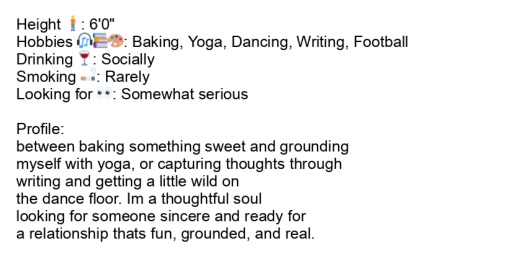

['Height 🧍: 5\'11"', 'Hobbies 🎧📚🎨: Drawing, Hiking, Singing, Meditation, Swimming ', 'Drinking 🍷: Often', 'Smoking 🚬: Never', 'Looking for 👀: Serious only ', '', 'Profile:', 'Im all about blending creativity with ', 'lifes adventureswhether its a scenic hike, sketching ', 'out a new idea, or just diving ', 'into a pool. Humor keeps me light, ', 'and passion fuels everything I do. Looking ', 'for a serious connection with someone whos ', 'ready to laugh, explore, and make every ', 'moment count.']
Using custom font


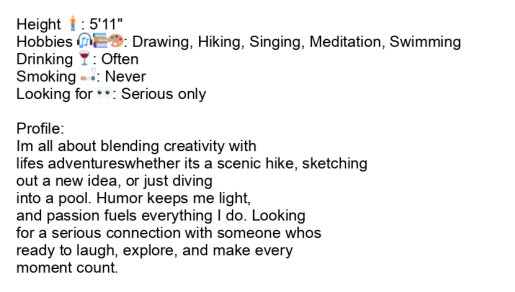

['Height 🧍: 6\'1"', 'Hobbies 🎧📚🎨: Gaming, Painting, Soccer, Cooking, Drawing ', 'Drinking 🍷: Never', 'Smoking 🚬: Often', 'Looking for 👀: Serious only ', '', 'Profile:', 'Perceptive with a side of creativity. ', 'Lifes best moments come from a splash ', 'of paint, a winning game, or a ', 'new recipe, and I savor each one. ', 'Im here to build a serious connection ', 'with someone who sees the world through ', 'their own unique lens. If you appreciate ', 'thoughtful conversations and playful perspectives, lets chat.']
Using custom font


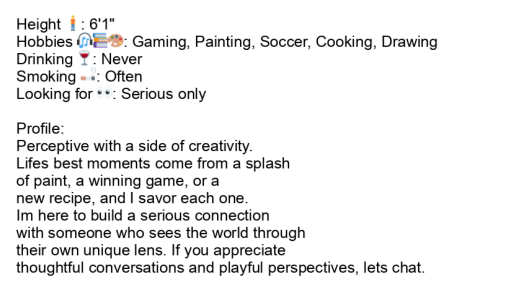

['Height 🧍: 5\'8"', 'Hobbies 🎧📚🎨: Cooking, Singing, Painting, Running, Baking ', 'Drinking 🍷: Often', 'Smoking 🚬: Rarely', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Im all about sunshine vibes and ', 'resilience. Lifes a feast to be shared, ', 'whether in the kitchen or out on ', 'a trail. Im looking for a partner ', 'who sees the bright side, stays open ', 'to adventure, and values the magic in ', 'the little things.']
Using custom font


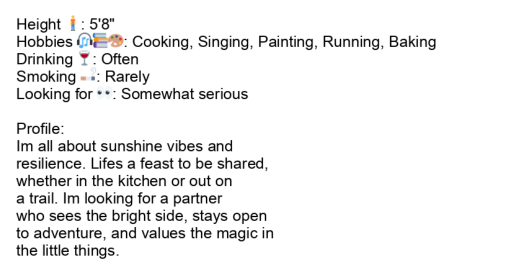

['Height 🧍: 5\'8"', 'Hobbies 🎧📚🎨: Drawing, Meditation, Basketball, Cooking, Reading ', 'Drinking 🍷: Never', 'Smoking 🚬: Socially', 'Looking for 👀: Serious only ', '', 'Profile:', 'Part artist, part thinker, and 100% ', 'playful. I mix creativity with a dash ', 'of curiosity, love getting lost in a ', 'sketch or a book, and whip up ', 'good vibes in the kitchen. Looking for ', 'someone who can match my intellectual spark, ', 'keep things serious yet spontaneous, and maybe ', 'join in on the court or the ', 'couch.']
Using custom font


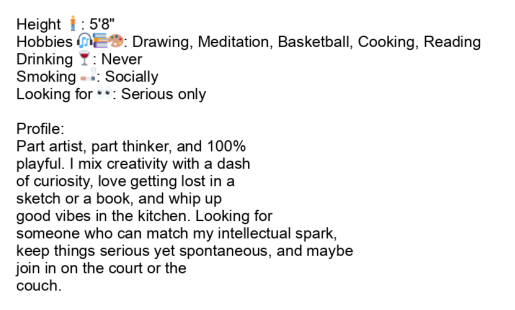

['Height 🧍: 6\'0"', 'Hobbies 🎧📚🎨: Hiking, Baking, Swimming, Drawing, Soccer ', 'Drinking 🍷: Socially', 'Smoking 🚬: Rarely', 'Looking for 👀: Serious only ', '', 'Profile:', 'With a witty outlook and a ', 'thoughtful approach to life, I love hiking ', 'and the creativity of baking and drawing. ', 'Swimming and soccer add balance to my ', 'days. Im seeking a serious relationship with ', 'someone who values exploration and meaningful conversations.']
Using custom font


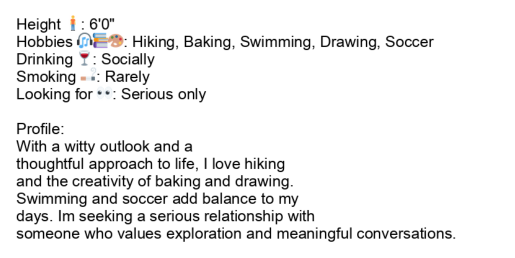

['Height 🧍: 5\'10"', 'Hobbies 🎧📚🎨: Dancing, Basketball, Gaming, Running, Yoga ', 'Drinking 🍷: Often', 'Smoking 🚬: Socially', 'Looking for 👀: Serious only ', '', 'Profile:', 'My life is fueled by passion ', 'and a taste for adventure, whether its ', 'dancing, basketball, or gaming. Running keeps me ', 'active, while yoga brings balance. Im looking ', 'for a serious relationship with someone whos ', 'excited to explore life and support each ', 'others dreams.']
Using custom font


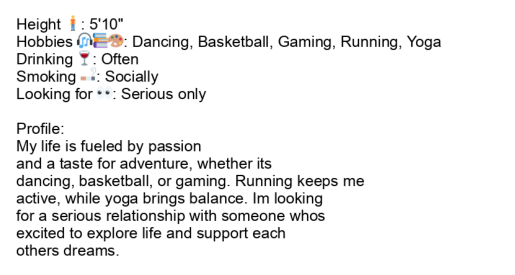

['Height 🧍: 6\'1"', 'Hobbies 🎧📚🎨: Drawing, Cooking, Singing, Dancing, Painting ', 'Drinking 🍷: Never', 'Smoking 🚬: Socially', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Boldly creative and here to spice ', 'up life with art, laughter, and a ', 'bit of dancing in the kitchen. Im ', 'not one to hold back, and Im ', 'looking for someone who shares my love ', 'for life and art. Lets keep things ', 'fun, a little serious, and 100% full ', 'of energy.']
Using custom font


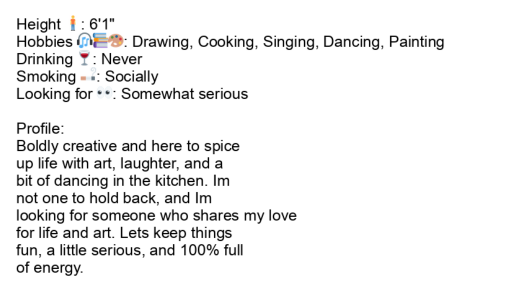

['Height 🧍: 5\'9"', 'Hobbies 🎧📚🎨: Yoga, Painting, Singing, Drawing, Writing ', 'Drinking 🍷: Never', 'Smoking 🚬: Rarely', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'Yoga grounds me, while painting and ', 'writing let my passions shine. Singing and ', 'drawing deepen my creativity, and Im after ', 'a somewhat serious relationship where we can ', 'inspire each other and embrace what truly ', 'moves us.']
Using custom font


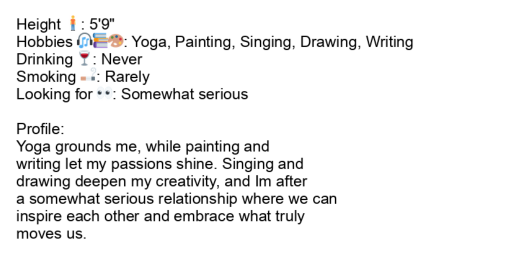

['Height 🧍: 5\'10"', 'Hobbies 🎧📚🎨: Yoga, Reading, Football, Writing, Swimming ', 'Drinking 🍷: Often', 'Smoking 🚬: Often', 'Looking for 👀: Something casual ', '', 'Profile:', 'I bring a laidback vibe mixed ', 'with a bit of sarcasm to life, ', 'enjoying the calm of yoga and the ', 'thrill of football. Reading, writing, and swimming ', 'are my ways to unwind. Im open ', 'to something casual, hoping to find someone ', 'who shares my humor and relaxed outlook.']
Using custom font


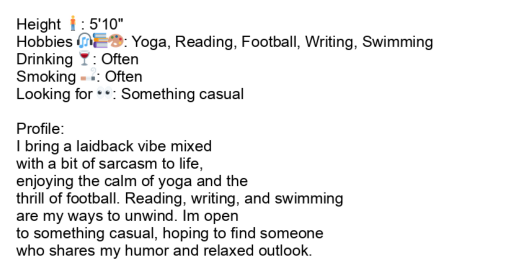

['Height 🧍: 6\'1"', 'Hobbies 🎧📚🎨: Dancing, Basketball, Football, Cooking, Singing ', 'Drinking 🍷: Socially', 'Smoking 🚬: Rarely', 'Looking for 👀: Somewhat serious ', '', 'Profile:', 'I bring optimism and passion to ', 'everything I do, from the dance floor ', 'to the kitchen. Football keeps my edge ', 'sharp, while cooking and singing let me ', 'unwind. Im looking for a somewhat serious ', 'relationship with someone who inspires and uplifts ', 'me.']
Using custom font


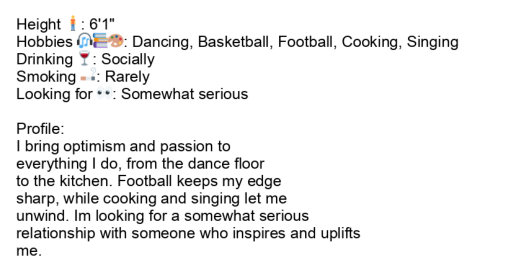

['Height 🧍: 6\'2"', 'Hobbies 🎧📚🎨: Running, Meditation, Reading, Hiking, Coding ', 'Drinking 🍷: Socially', 'Smoking 🚬: Often', 'Looking for 👀: Something casual ', '', 'Profile:', 'Im the perfect mix of wit, ', 'drive, and downtoearth vibes. Equally at home ', 'scaling trails or diving into deep conversations. ', 'Im here for some lighthearted fun and ', 'good company. If youre up for spontaneous ', 'adventures and lively conversation, lets see where ', 'things go.']
Using custom font


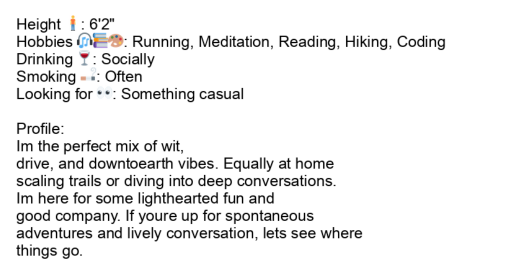

['Height 🧍: 5\'11"', 'Hobbies 🎧📚🎨: Basketball, Football, Dancing, Running, Singing ', 'Drinking 🍷: Often', 'Smoking 🚬: Rarely', 'Looking for 👀: Serious only ', '', 'Profile:', 'A dash of wit, a bit ', 'of sport, and plenty of rhythmthats me. ', 'From highenergy court time to karaoke nights, ', 'I thrive on connection and a little ', 'bit of sass. Im here for someone ', 'serious who can keep up with my ', 'energy, appreciates the sport of banter, and ', 'sees life as a bold adventure.']
Using custom font


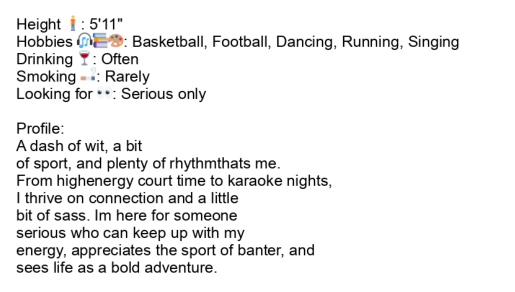

['Height 🧍: 5\'9"', 'Hobbies 🎧📚🎨: Yoga, Writing, Musician, Football, Hiking ', 'Drinking 🍷: Never', 'Smoking 🚬: Often', 'Looking for 👀: Something casual ', '', 'Profile:', 'Writing and music let me express ', 'my adventurous side, and I stay active ', 'through yoga, football, and hiking. Im interested ', 'in something casual with someone who appreciates ', 'a mix of humor, charm, and a ', 'love for the outdoors.']
Using custom font


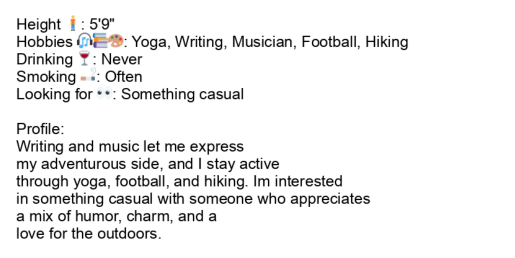

['Height 🧍: 5\'10"', 'Hobbies 🎧📚🎨: Meditation, Soccer, Running, Football, Basketball ', 'Drinking 🍷: Often', 'Smoking 🚬: Never', 'Looking for 👀: Serious only ', '', 'Profile:', 'I find balance in meditation and ', 'excitement in sports like soccer, football, and ', 'basketball. My generous nature drives me to ', 'connect deeply, and my perceptive outlook keeps ', 'me grounded. Im looking for a serious ', "relationship where we can support each other's ", 'growth and share lifes passions.']
Using custom font


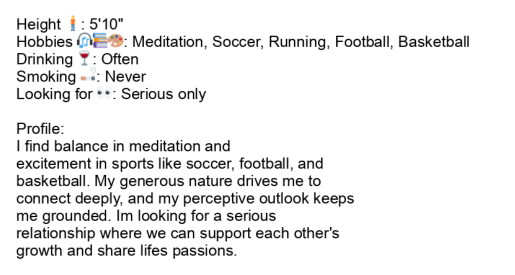

In [74]:
# get file in root of extension "end"
def getf(root, end='.txt'):
    for f in os.listdir(root):
        if(f.endswith(end)):
            return f
    return None
    
root = 'Profiles_with_jsons'
# change root to reflect actual data location
for g in os.listdir(root):
    if(g=='Woman'):
        transformHeight = True
        print("Transforming Heights!")
    else:
        transformHeight = False
    gpath = joinpath(root, g)
    for profile in os.listdir(gpath):
        ppath = joinpath(gpath, profile)
        textpath = joinpath(ppath, getf(ppath, '.txt'))
        # imagepath = joinpath(ppath, getf(ppath, '.png'))
        jsonpath = joinpath(ppath, getf(ppath, '.json'))

        jsontext = processjson(jsonpath, transformHeight=transformHeight)
        profiletext = getprofile(textpath)
        textimage = text_to_image(jsontext+"\n"+profiletext, font_size=25)
        
        textimage.save(joinpath("./figures",f"{profile}.jpg"))
        plt.imshow(textimage)
        plt.axis('off')
        plt.show()